In [5]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [1]:
import pandas as pd
df = pd.read_csv('/content/final.csv')

In [2]:
df.to_csv("final.csv", index=False)

# **Í∞úÏù∏ - Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàò**

### **[Í∞ÄÏÑ§1] Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàòÍ∞Ä ÎÇÆÏùÑÏàòÎ°ù Ïõê/Îã¨Îü¨ ÌôòÏú®ÏùÄ ÏÉÅÏäπÌïúÎã§**

In [3]:
correlation = df[["Ïõê/Îã¨Îü¨ÌôòÏú®", "Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò"]].corr().iloc[0, 1]
print(f"Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàòÏôÄ Ïõê/Îã¨Îü¨ ÌôòÏú®Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}")

Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàòÏôÄ Ïõê/Îã¨Îü¨ ÌôòÏú®Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.562


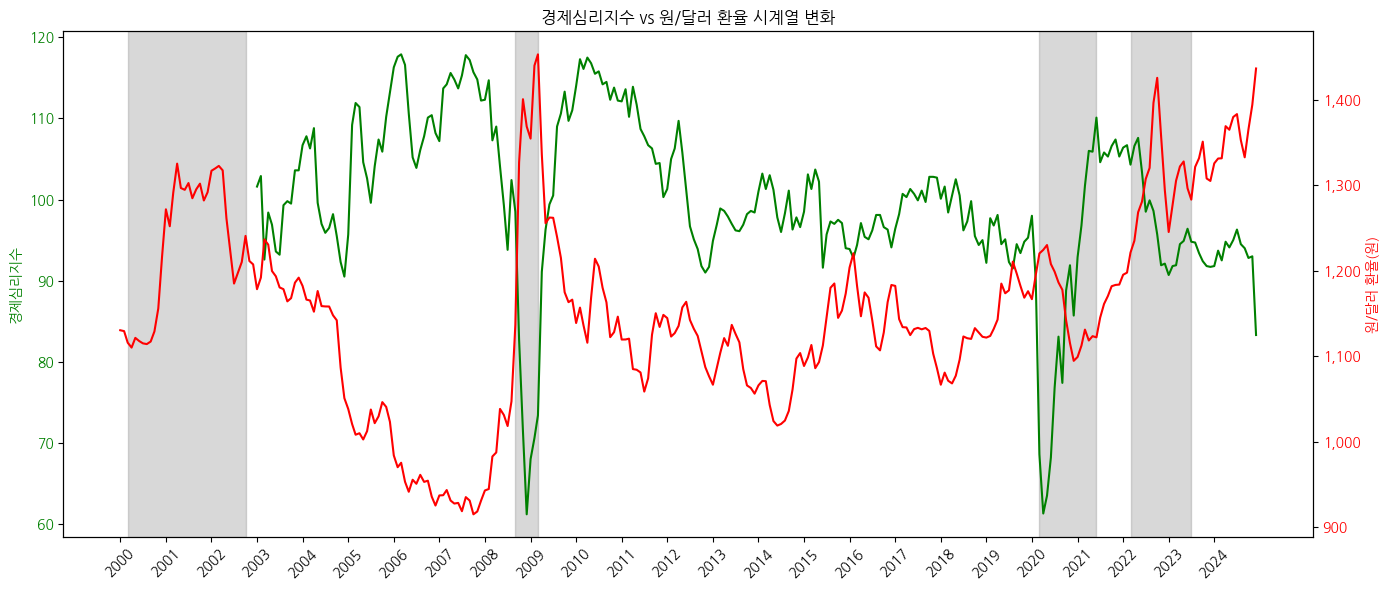

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Ïù¥Î≤§Ìä∏ Í∏∞Í∞ÑÎßå Î¶¨Ïä§Ìä∏Î°ú ÏÑ§Ï†ï
event_periods = [
    ('2000-03', '2002-10'),  # Îã∑Ïª¥ Î≤ÑÎ∏î
    ('2008-09', '2009-03'),  # Í∏ÄÎ°úÎ≤å Í∏àÏúµÏúÑÍ∏∞
    ('2020-03', '2021-06'),  # ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπ
    ('2022-03', '2023-07'),  # ÏûêÏù¥Ïñ∏Ìä∏ Ïä§ÌÖù
]

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df_plot = df.copy().reset_index()
df_plot["TIME"] = pd.to_datetime(df_plot["TIME"].astype(str))
df_plot["Ïó∞ÎèÑ"] = df_plot["TIME"].dt.year

# xÏ∂ï ÎààÍ∏à
year_ticks = df_plot.groupby("Ïó∞ÎèÑ")["TIME"].first().values
year_labels = df_plot["Ïó∞ÎèÑ"].unique()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
ax1 = plt.gca()

# Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàò
ax1.plot(df_plot["TIME"], df_plot["Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò"], color="green", label="Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàò")
ax1.set_ylabel("Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàò", color="green")
ax1.tick_params(axis="y", labelcolor="green")

# Ïõê/Îã¨Îü¨ ÌôòÏú®
ax2 = ax1.twinx()
ax2.plot(df_plot["TIME"], df_plot["Ïõê/Îã¨Îü¨ÌôòÏú®"], color="red", label="Ïõê/Îã¨Îü¨ ÌôòÏú®")
ax2.set_ylabel("Ïõê/Îã¨Îü¨ ÌôòÏú®(Ïõê)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))

# ÌöåÏÉâ ÏùåÏòÅÏúºÎ°ú Ïù¥Î≤§Ìä∏ Í∏∞Í∞Ñ ÌëúÏãú (ÌÖçÏä§Ìä∏ ÏóÜÏùå)
for start, end in event_periods:
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='gray', alpha=0.3)

# xÏ∂ï ÏÑ§Ï†ï
ax1.set_xticks(year_ticks)
ax1.set_xticklabels(year_labels, rotation=45)

# Ï†úÎ™©
plt.title("Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàò vs Ïõê/Îã¨Îü¨ ÌôòÏú® ÏãúÍ≥ÑÏó¥ Î≥ÄÌôî")
plt.tight_layout()
plt.show()

| Ïó∞ÎèÑ       | Ï£ºÏöî Ïù¥Î≤§Ìä∏                     | Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàò Î∞òÏùë      | Ïõê/Îã¨Îü¨ ÌôòÏú® Î∞òÏùë         |
|------------|----------------------------------|-------------------------|----------------------------|
| **2001**   | 9¬∑11 ÌÖåÎü¨                        | Í∏âÍ≤©Ìïú Ïã¨Î¶¨ ÌïòÎùΩ       | ÌôòÏú® ÏÉÅÏäπ (ÏõêÌôî ÏïΩÏÑ∏)      |
| **2008~09**| Í∏ÄÎ°úÎ≤å Í∏àÏúµÏúÑÍ∏∞                  | Í∏âÎùΩ                    | Í∏âÎì± (1500ÏõêÎåÄ Ï†ëÍ∑º)       |
| **2010~12**| Ïú†ÎüΩ Ïû¨Ï†ïÏúÑÍ∏∞                    | Î∂àÏïàÏ†ï                  | Îì±ÎùΩ (1100~1200Ïõê ÏÇ¨Ïù¥)    |
| **2015~16**| ÏúÑÏïàÌôî Ï†àÌïò, Î∏åÎ†âÏãúÌä∏(ÏòÅÍµ≠ Ïú†ÎüΩÏó∞Ìï© ÌÉàÌá¥)           | Ïã¨Î¶¨ ÏïΩÌôî               | ÏÉÅÏäπ (Î∂àÏïà Ïã¨Ìôî)           |
| **2020**   | ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπ                    | Í∏âÎùΩ                    | Í∏âÎì± (ÏúÑÍ∏∞ Ïãú ÏõêÌôî ÏïΩÏÑ∏)   |
| **2022~23**| Áæé Í∏∞Ï§ÄÍ∏àÎ¶¨ Í∏âÎì± (Ïó∞Ï§Ä Í∏¥Ï∂ï)     | Ïã¨Î¶¨ ÏúÑÏ∂ï ÏßÄÏÜç          | 1400Ïõê ÎèåÌåå (ÌôòÏú® Í∏âÎì±)     |
| **2024**   | Í∏¥Ï∂ï ÏôÑÌôî Í∏∞ÎåÄ, ÌôòÏú® ÏïàÏ†ï Í∏∞Ï°∞   | Î∞òÎì± ÏãúÎèÑ               | ÏôÑÎßåÌïú ÌïòÎùΩÏÑ∏              |


[Í∞ÄÏÑ§ 1] ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.562, ÏñëÏ∏° p-value: 0.0000


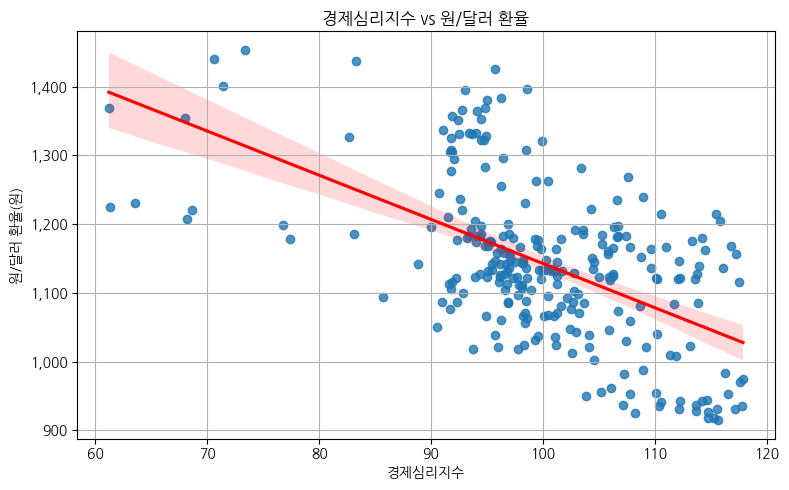

In [8]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 1. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
subset = df[['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'Ïõê/Îã¨Îü¨ÌôòÏú®']].dropna()
x = subset['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò']
y = subset['Ïõê/Îã¨Îü¨ÌôòÏú®']

# 2. ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÏñëÏ∏°Í≤ÄÏ†ï)
corr, pval = pearsonr(x, y)
print(f"[Í∞ÄÏÑ§ 1] ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr:.3f}, ÏñëÏ∏° p-value: {pval:.4f}")

# 3. ÏÇ∞Ï†êÎèÑ + ÌöåÍ∑ÄÏÑ† ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.title("Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàò vs Ïõê/Îã¨Îü¨ ÌôòÏú®")
plt.xlabel("Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàò")
plt.ylabel("Ïõê/Îã¨Îü¨ ÌôòÏú®(Ïõê)")

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.grid(True)
plt.tight_layout()
plt.show()

### [Í∞ÄÏÑ§ 1] Ï∂îÎ°†ÌÜµÍ≥Ñ Í≤∞Í≥º

- ÏÉÅÍ¥ÄÍ≥ÑÏàò:  - 0.562 **Í∞ïÌïú ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ** Ï°¥Ïû¨

- Îã®Ï∏° p-value: 0.00000

  ‚Üí Í∞ïÌïú ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ï°¥Ïû¨

  ‚Üí p-value < 0.05Î°ú ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥Ñ ÌôïÏù∏Îê®

‚ñ∫ Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàòÏôÄ Ïõê/Îã¨Îü¨ ÌôòÏú® Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî** -0.562**Î°ú,
Í≤ΩÏ†úÏã¨Î¶¨Í∞Ä ÏïÖÌôîÎê†ÏàòÎ°ù ÌôòÏú®Ïù¥ ÏÉÅÏäπÌïòÎäî Í∞ïÌïú ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÌôïÏù∏ÎêòÏóàÎã§.

ÎòêÌïú **p-valueÎäî 0.0000**ÏúºÎ°ú, Ìï¥Îãπ Í¥ÄÍ≥ÑÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°úÎèÑ Îß§Ïö∞ Ïú†ÏùòÎØ∏ÌïòÏòÄÎã§.
Ïù¥Îäî Í≤ΩÏ†ú Î∂àÏïà ÏÉÅÌô©ÏóêÏÑú ÏïàÏ†ÑÏûêÏÇ∞Ïù∏ Îã¨Îü¨Ïóê ÎåÄÌïú ÏàòÏöîÍ∞Ä Ï¶ùÍ∞ÄÌïòÎ©∞,

Ïã¨Î¶¨Ï†Å ÏöîÏù∏Ïù¥ ÌôòÏú® ÏÉÅÏäπÏùò ÏÑ†ÌñâÏßÄÌëúÎ°ú ÏûëÏö©Ìï† Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§.

## **[Í∞ÄÏÑ§2-1] ÌïúÎØ∏ Í∏àÎ¶¨Ï∞®Í∞Ä Ïª§ÏßàÏàòÎ°ù Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï°ÏùÄ Ï¶ùÍ∞ÄÌï† Í≤ÉÏù¥Îã§.**

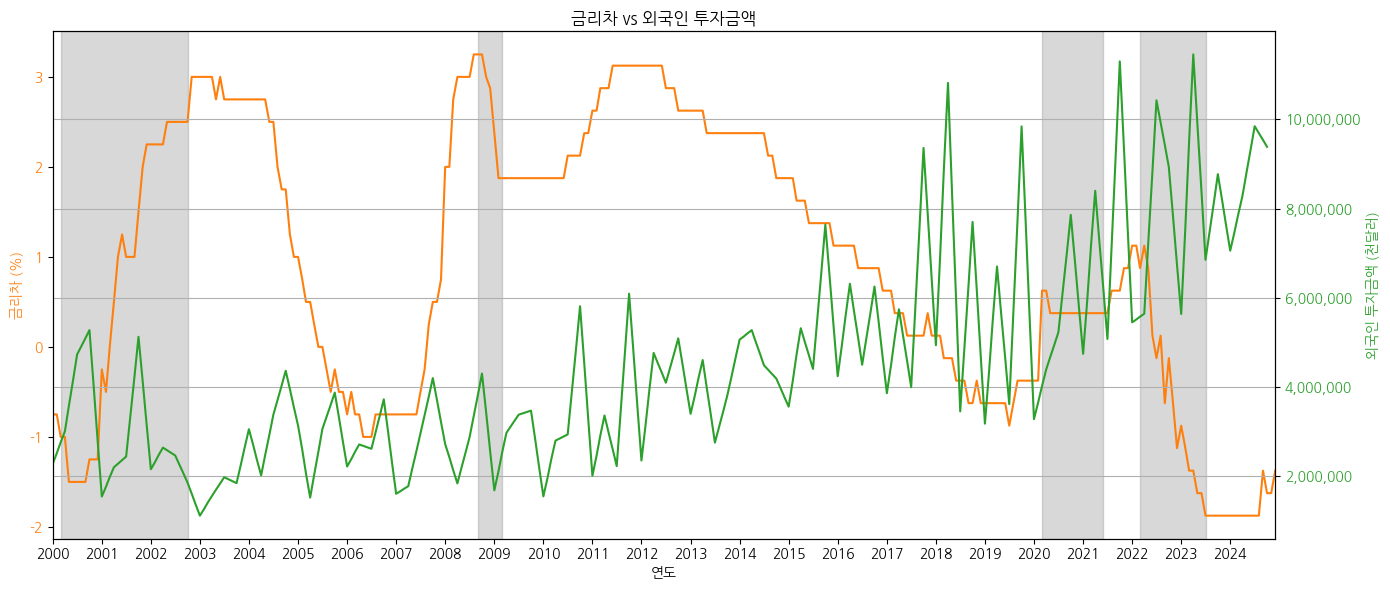

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd

# TIME Ïª¨ÎüºÏùÑ datetimeÏúºÎ°ú Î≥ÄÌôò
df['TIME'] = pd.to_datetime(df['TIME'])

# Í∏àÎ¶¨Ï∞® Í≥ÑÏÇ∞
df['Í∏àÎ¶¨Ï∞®'] = df['ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨'] - df['ÎØ∏Íµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨']

# Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
fig, ax1 = plt.subplots(figsize=(14, 6))

# Í∏àÎ¶¨Ï∞® - ÏôºÏ™Ω yÏ∂ï
color1 = 'tab:orange'
ax1.set_xlabel('Ïó∞ÎèÑ')
ax1.set_ylabel('Í∏àÎ¶¨Ï∞® (%)', color=color1)
ax1.plot(df['TIME'], df['Í∏àÎ¶¨Ï∞®'], color=color1, label='Í∏àÎ¶¨Ï∞®')
ax1.tick_params(axis='y', labelcolor=color1)

# xÏ∂ï ÏÑ§Ï†ï: Ïó∞ÎèÑ Îã®ÏúÑÎ°ú Í∞ÑÍ≤© ÎßûÏ∂îÍ∏∞
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0)
ax1.set_xlim([df['TIME'].min(), df['TIME'].max()])

# Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï° - Ïò§Î•∏Ï™Ω yÏ∂ï
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï° (Ï≤úÎã¨Îü¨)', color=color2)
ax2.plot(df['TIME'], df['Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°'], color=color2, label='Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï°')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))

# üéØ Ïù¥Î≤§Ìä∏ Í∏∞Í∞Ñ ÌöåÏÉâ ÏùåÏòÅ ÌëúÏãú
event_periods = [
    ('2000-03', '2002-10'),
    ('2008-09', '2009-03'),
    ('2020-03', '2021-06'),
    ('2022-03', '2023-07')
]

for start, end in event_periods:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    ax1.axvspan(mdates.date2num(start_date), mdates.date2num(end_date), color='gray', alpha=0.3)

# Ï†úÎ™© Î∞è Î†àÏù¥ÏïÑÏõÉ
plt.title('Í∏àÎ¶¨Ï∞® vs Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï°')
fig.tight_layout()
plt.grid(True)
plt.show()

### **[Í∞ÄÏÑ§ 2-1] ÏãúÍ≥ÑÏó¥ Í≤∞Î°†**

* Ï≤òÏùå Í∞ÄÏ†ï: "Í≤ΩÏ†úÏã¨Î¶¨Í∞Ä ÎÇòÎπ†ÏßÄÎ©¥ Ïô∏Ïûê Ïú†ÏûÖÏù¥ Ï§ÑÏñ¥Îì§ Í≤É"

  ‚Üí Îç∞Ïù¥ÌÑ∞ ÏÉÅ Î∂ÄÎ∂ÑÏ†ÅÏúºÎ°ú ÌÉÄÎãπ

* ÏòàÏô∏ Î∞úÍ≤¨: "Ïã¨Î¶¨ ÎÇòÏÅúÎç∞ÎèÑ Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∞Ä ÎäòÏñ¥ÎÇú ÏãúÍ∏∞ Ï°¥Ïû¨ (2022~2023)"

  ‚Üí Í≥†Í∏àÎ¶¨/Í≥†ÌôòÏú®Ïùò ÏàòÏùµ Í∏∞ÌöåÍ∞Ä Ïã¨Î¶¨Î≥¥Îã§ Îçî ÌÅ∞ Ïú†Ïù∏Ïù¥ Îê®

* Í∞ÄÏÑ§ ÌôïÏû• ÌïÑÏöîÏÑ±: "Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÎäî Í≤ΩÏ†úÏã¨Î¶¨ Ïô∏ÏóêÎèÑ Í∏àÎ¶¨Ï∞®, ÌôòÏú® Îì± Íµ¨Ï°∞Ï†Å Î≥ÄÏàòÏùò ÏòÅÌñ•ÏùÑ ÎèôÏãúÏóê Î∞õÎäîÎã§"

  ‚Üí Í∑∏Îü¨ÎÇò Í∏àÎ¶¨Ï∞®Îäî Ïã§Ï†úÎ°úÎèÑ Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÎ•º ÏÑ§Î™ÖÌïòÏßÄ Î™ªÌñàÏùå (Ïò§ÌûàÎ†§ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎäî ÏùåÏùò Î∞©Ìñ•)

<br>
‚ñ∫ Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàòÏôÄ Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï°ÏùÄ ÏïΩÌïú ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥Î©∞, ÏùºÎ∂Ä ÏãúÍ∏∞ÏóêÎäî Ïã¨Î¶¨ Î∂àÏïàÏù¥ Ïô∏Ïûê Ïù¥ÌÉàÍ≥º Ìï®Íªò Î∞úÏÉùÌñàÎã§.

Í∑∏Îü¨ÎÇò Ï†ÑÏ≤¥Ï†ÅÏúºÎ°úÎäî Í≤ΩÏ†úÏã¨Î¶¨ÏôÄ Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê ÏÇ¨Ïù¥Ïùò ÏßÅÏ†ëÏ†ÅÏù∏ Ïó∞Í¥ÄÏÑ±ÏùÄ ÏïΩÌïòÎ©∞,

Í∏àÎ¶¨Ï∞®ÏôÄÏùò Í¥ÄÍ≥ÑÏóêÏÑúÎäî Ïò§ÌûàÎ†§ ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÇòÌÉÄÎÇò,

Í∏∞Ï°¥Ïùò "Í∏àÎ¶¨Ï∞® ÌôïÎåÄ ‚Üí Ïô∏Ïûê Ïú†ÏûÖ" Í∞ÄÏÑ§Í≥ºÎäî Î∞òÎåÄÎêòÎäî ÌùêÎ¶ÑÏùÑ Î≥¥ÏòÄÎã§.

Ïù¥Ïóê Îî∞Îùº Ïô∏Íµ≠Ïù∏ ÏûêÍ∏à Ïú†ÏûÖÏùÄ Í∏àÎ¶¨ÎÇò Ïã¨Î¶¨ÎøêÎßå ÏïÑÎãàÎùº Îã§Î•∏ ÏöîÏù∏, ÏòàÏª®ÎåÄ ÌôòÏú® ÏàòÏ§ÄÏù¥ÎÇò Í∏ÄÎ°úÎ≤å Ïú†ÎèôÏÑ± Ïó¨Í±¥ Îì±Ïùò Î≥µÌï©Ï†Å ÏòÅÌñ•ÏùÑ Î∞õÏùÑ Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§.

In [16]:
corr_1 = df[["Í∏àÎ¶¨Ï∞®", "Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°"]].corr().iloc[0, 1]
print(f"Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°Í≥º Í∏àÎ¶¨Ï∞® Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr_1:.3f}")

Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°Í≥º Í∏àÎ¶¨Ï∞® Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.475


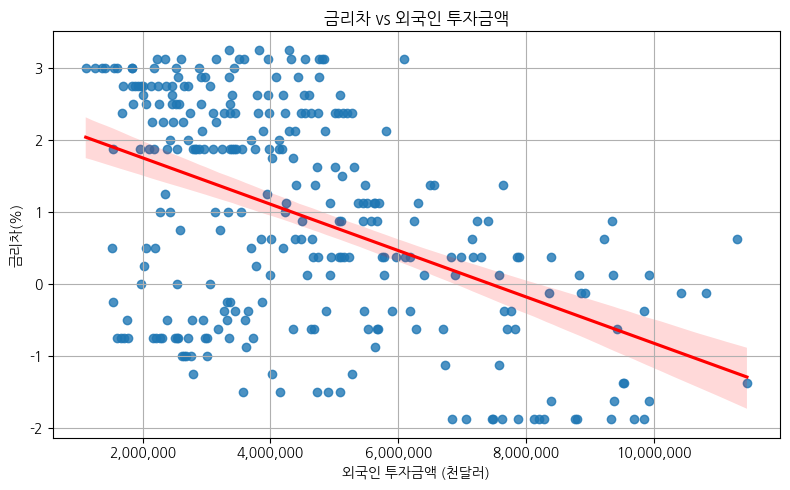

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÌïÑÏöîÌïú Î≥ÄÏàòÎßå Ï∂î
subset = df[['Í∏àÎ¶¨Ï∞®', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']].dropna()

plt.figure(figsize=(8, 5))
sns.regplot(x='Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°', y='Í∏àÎ¶¨Ï∞®', data=subset, line_kws={"color": "red"})

# Ï∂ï Îã®ÏúÑ ÏùºÎ∞ò Ïà´ÏûêÎ°ú ÌëúÏãú (ÏßÄÏàò ÌòïÏãù Ï†úÍ±∞)
plt.ticklabel_format(style='plain', axis='y')

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Ï∂ï Ïù¥Î¶Ñ
plt.title("Í∏àÎ¶¨Ï∞® vs Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï°")
plt.xlabel("Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï° (Ï≤úÎã¨Îü¨)")
plt.ylabel("Í∏àÎ¶¨Ï∞®(%)")

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.grid(True)
plt.tight_layout()
plt.show()

### **[Í∞ÄÏÑ§ 2-1] Í≤∞Î°†**

* Ï≤òÏùå Í∞ÄÏ†ï: "Í≤ΩÏ†úÏã¨Î¶¨Í∞Ä ÎÇòÎπ†ÏßÄÎ©¥ Ïô∏Ïûê Ïú†ÏûÖÏù¥ Ï§ÑÏñ¥Îì§ Í≤É"

  ‚Üí Îç∞Ïù¥ÌÑ∞ ÏÉÅ Î∂ÄÎ∂ÑÏ†ÅÏúºÎ°ú ÌÉÄÎãπ

* ÏòàÏô∏ Î∞úÍ≤¨: "Ïã¨Î¶¨ ÎÇòÏÅúÎç∞ÎèÑ Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∞Ä ÎäòÏñ¥ÎÇú ÏãúÍ∏∞ Ï°¥Ïû¨ (2022~2023)"

  ‚Üí Í≥†Í∏àÎ¶¨/Í≥†ÌôòÏú®Ïùò ÏàòÏùµ Í∏∞ÌöåÍ∞Ä Ïã¨Î¶¨Î≥¥Îã§ Îçî ÌÅ∞ Ïú†Ïù∏Ïù¥ Îê®

* Í∞ÄÏÑ§ ÌôïÏû• ÌïÑÏöîÏÑ±: "Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÎäî Í≤ΩÏ†úÏã¨Î¶¨ Ïô∏ÏóêÎèÑ Í∏àÎ¶¨Ï∞®, ÌôòÏú® Îì± Íµ¨Ï°∞Ï†Å Î≥ÄÏàòÏùò ÏòÅÌñ•ÏùÑ ÎèôÏãúÏóê Î∞õÎäîÎã§"

  ‚Üí Í∑∏Îü¨ÎÇò Í∏àÎ¶¨Ï∞®Îäî Ïã§Ï†úÎ°úÎèÑ Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÎ•º ÏÑ§Î™ÖÌïòÏßÄ Î™ªÌñàÏùå (Ïò§ÌûàÎ†§ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎäî ÏùåÏùò Î∞©Ìñ•)

<br>
‚ñ∫ Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàòÏôÄ Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï°ÏùÄ ÏïΩÌïú ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥Î©∞, ÏùºÎ∂Ä ÏãúÍ∏∞ÏóêÎäî Ïã¨Î¶¨ Î∂àÏïàÏù¥ Ïô∏Ïûê Ïù¥ÌÉàÍ≥º Ìï®Íªò Î∞úÏÉùÌñàÎã§.

Í∑∏Îü¨ÎÇò Ï†ÑÏ≤¥Ï†ÅÏúºÎ°úÎäî Í≤ΩÏ†úÏã¨Î¶¨ÏôÄ Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê ÏÇ¨Ïù¥Ïùò ÏßÅÏ†ëÏ†ÅÏù∏ Ïó∞Í¥ÄÏÑ±ÏùÄ ÏïΩÌïòÎ©∞,

Í∏àÎ¶¨Ï∞®ÏôÄÏùò Í¥ÄÍ≥ÑÏóêÏÑúÎäî Ïò§ÌûàÎ†§ ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÇòÌÉÄÎÇò,

Í∏∞Ï°¥Ïùò "Í∏àÎ¶¨Ï∞® ÌôïÎåÄ ‚Üí Ïô∏Ïûê Ïú†ÏûÖ" Í∞ÄÏÑ§Í≥ºÎäî Î∞òÎåÄÎêòÎäî ÌùêÎ¶ÑÏùÑ Î≥¥ÏòÄÎã§.

Ïù¥Ïóê Îî∞Îùº Ïô∏Íµ≠Ïù∏ ÏûêÍ∏à Ïú†ÏûÖÏùÄ Í∏àÎ¶¨ÎÇò Ïã¨Î¶¨ÎøêÎßå ÏïÑÎãàÎùº Îã§Î•∏ ÏöîÏù∏, ÏòàÏª®ÎåÄ ÌôòÏú® ÏàòÏ§ÄÏù¥ÎÇò Í∏ÄÎ°úÎ≤å Ïú†ÎèôÏÑ± Ïó¨Í±¥ Îì±Ïùò Î≥µÌï©Ï†Å ÏòÅÌñ•ÏùÑ Î∞õÏùÑ Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§.

## **[Í∞ÄÏÑ§ 2-2] Ïõê/Îã¨Îü¨ ÌôòÏú®Ïù¥ ÏÉÅÏäπÌïòÎ©¥ Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï°ÏùÄ Ï¶ùÍ∞ÄÌï† Í≤ÉÏù¥Îã§.**

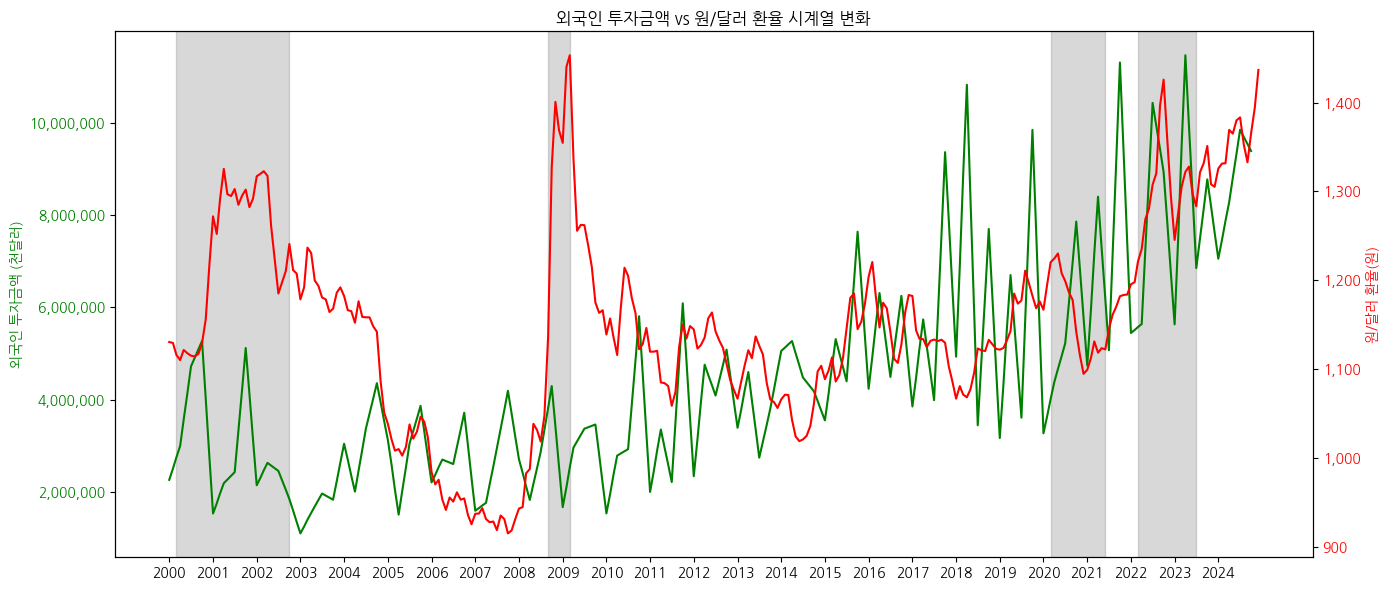

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥µÏÇ¨ Î∞è ÏãúÍ∞Ñ Ï≤òÎ¶¨
df_plot = df.copy()
df_plot = df_plot.reset_index()
df_plot["TIME"] = pd.to_datetime(df_plot["TIME"])
df_plot["Ïó∞ÎèÑ"] = df_plot["TIME"].dt.year
year_ticks = df_plot.groupby("Ïó∞ÎèÑ")["TIME"].first().values
year_labels = df_plot["Ïó∞ÎèÑ"].unique()

# ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(14, 6))

# Ï∂ï 1: Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï°
ax1.plot(df_plot["TIME"], df_plot["Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°"], color="green", label="Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï°")
ax1.set_ylabel("Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï° (Ï≤úÎã¨Îü¨)", color="green")
ax1.tick_params(axis="y", labelcolor="green")
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Ï∂ï 2: Ïõê/Îã¨Îü¨ ÌôòÏú®
ax2 = ax1.twinx()
ax2.plot(df_plot["TIME"], df_plot["Ïõê/Îã¨Îü¨ÌôòÏú®"], color="red", label="Ïõê/Îã¨Îü¨ ÌôòÏú®")
ax2.set_ylabel("Ïõê/Îã¨Îü¨ ÌôòÏú®(Ïõê)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))

# üìå Ïù¥Î≤§Ìä∏ Í∏∞Í∞Ñ ÌöåÏÉâ ÏùåÏòÅ ÌëúÏãú
event_periods = [
    ('2000-03', '2002-10'),  # Îã∑Ïª¥ Î≤ÑÎ∏î
    ('2008-09', '2009-03'),  # Í∏ÄÎ°úÎ≤å Í∏àÏúµ ÏúÑÍ∏∞
    ('2020-03', '2021-06'),  # ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπ
    ('2022-03', '2023-07'),  # ÏûêÏù¥Ïñ∏Ìä∏ Ïä§ÌÖù
]

for start, end in event_periods:
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='gray', alpha=0.3)

# xÏ∂ï Ïó∞ÎèÑ ÏÑ§Ï†ï
ax1.set_xticks(year_ticks)
ax1.set_xticklabels(year_labels, rotation=0)

# Ï†úÎ™© Î∞è Î†àÏù¥ÏïÑÏõÉ
plt.title("Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï° vs Ïõê/Îã¨Îü¨ ÌôòÏú® ÏãúÍ≥ÑÏó¥ Î≥ÄÌôî")
plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import pearsonr
# ÌïÑÏöîÌïú Ïª¨Îüº Ï†ïÎ¶¨
subset = df[['Ïõê/Îã¨Îü¨ÌôòÏú®', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']].dropna()
x = subset['Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']
y = subset['Ïõê/Îã¨Îü¨ÌôòÏú®']

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr, pval = pearsonr(x, y)
print(f"ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr:.3f}, ÏñëÏ∏° p-value: {pval:.4f}")

ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.344, ÏñëÏ∏° p-value: 0.0000


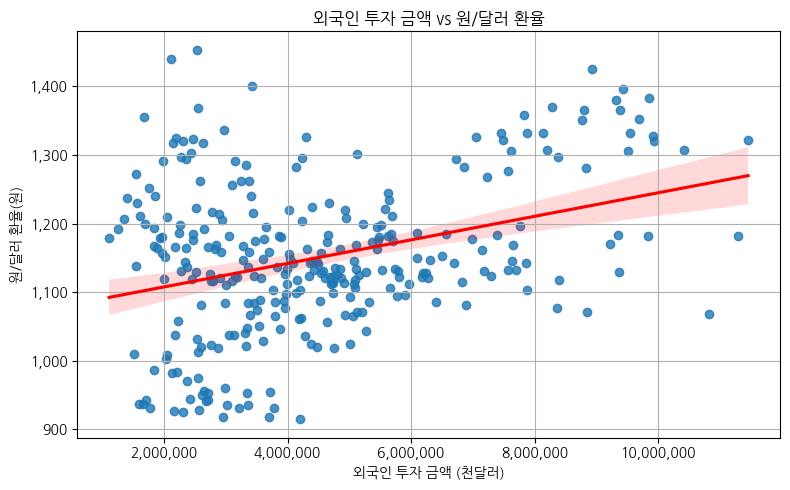

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.title("Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï° vs Ïõê/Îã¨Îü¨ ÌôòÏú®")
plt.xlabel("Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï° (Ï≤úÎã¨Îü¨)")
plt.ylabel("Ïõê/Îã¨Îü¨ ÌôòÏú®(Ïõê)")

# Ï∂ï Îã®ÏúÑ ÏùºÎ∞ò ÌëúÍ∏∞Î°ú Î≥ÄÍ≤Ω
plt.ticklabel_format(style='plain', axis='x')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.grid(True)
plt.tight_layout()
plt.show()

##  **[Í∞ÄÏÑ§ 6] Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï°Ïù¥ ÎäòÎ©¥ Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâÎèÑ Ï¶ùÍ∞ÄÌï† Í≤ÉÏù¥Îã§.**


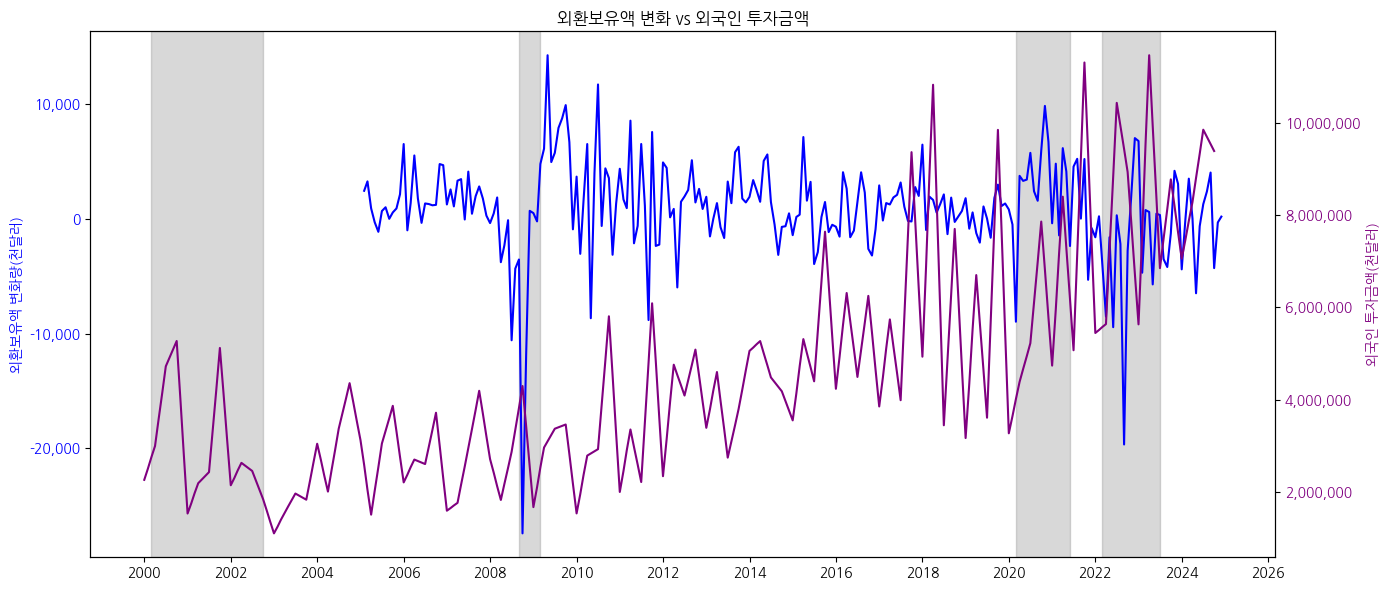

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd

# Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâ Í≥ÑÏÇ∞
df['Ïô∏ÌôòÎ≥¥Ïú†Ïï°_Î≥ÄÌôî'] = df['ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°'].diff()
df['TIME'] = pd.to_datetime(df['TIME'])

# ÏãúÍ∞ÅÌôî
fig, ax3 = plt.subplots(figsize=(14, 6))

# Ï¢åÏ∏°: Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâ
ax3.plot(df['TIME'], df['Ïô∏ÌôòÎ≥¥Ïú†Ïï°_Î≥ÄÌôî'], color='blue')
ax3.set_ylabel('Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâ(Ï≤úÎã¨Îü¨)', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Ïö∞Ï∏°: Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï°
ax3b = ax3.twinx()
ax3b.plot(df['TIME'], df['Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°'], color='purple')
ax3b.set_ylabel('Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï°(Ï≤úÎã¨Îü¨)', color='purple')
ax3b.tick_params(axis='y', labelcolor='purple')
ax3b.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))

# üéØ Ïù¥Î≤§Ìä∏ Íµ¨Í∞Ñ ÌöåÏÉâ ÏùåÏòÅ Ï∂îÍ∞Ä
event_periods = [
    ('2000-03', '2002-10'),
    ('2008-09', '2009-03'),
    ('2020-03', '2021-06'),
    ('2022-03', '2023-07'),
]

for start, end in event_periods:
    ax3.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='gray', alpha=0.3)

# Ï†úÎ™© Î∞è Î†àÏù¥ÏïÑÏõÉ
ax3.set_title('Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôî vs Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï°')
plt.tight_layout()
plt.show()


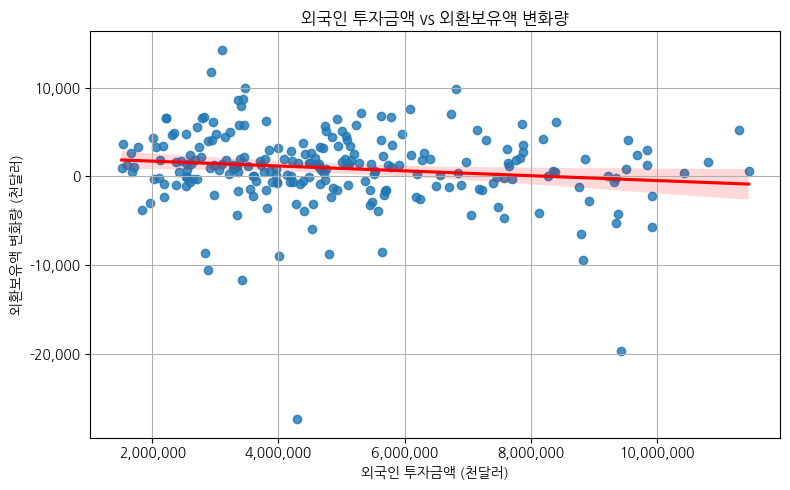

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Í≤∞Ï∏°Í∞í Ï†úÍ±∞Ìïú ÏÑúÎ∏åÏÖã ÏÉùÏÑ±
subset = df[['Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°', 'Ïô∏ÌôòÎ≥¥Ïú†Ïï°_Î≥ÄÌôî']].dropna()

plt.figure(figsize=(8, 5))
sns.regplot(
    x='Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°',
    y='Ïô∏ÌôòÎ≥¥Ïú†Ïï°_Î≥ÄÌôî',
    data=subset,
    line_kws={"color": "red"}
)

# xÏ∂ï Îã®ÏúÑ ÏùºÎ∞ò Ïà´ÏûêÎ°ú ÌëúÏãú
plt.ticklabel_format(style='plain', axis='x')

# Ï†úÎ™© Î∞è ÎùºÎ≤® ÏÑ§Ï†ï
plt.title("Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï° vs Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâ")
plt.xlabel("Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï° (Ï≤úÎã¨Îü¨)")
plt.ylabel("Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâ (Ï≤úÎã¨Îü¨)")

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.grid(True)
plt.tight_layout()
plt.show()


‚ñ∫ Í∞ÄÏÑ§ÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄÎßå,

Î∞©Ìñ•Ïù¥ Î∞òÎåÄ ‚Üí Ïô∏ÌôòÎ≥¥Ïú†Ïï° Ï¶ùÍ∞ÄÎäî Ïô∏Íµ≠Ïù∏ ÏûêÍ∏à Ïú†ÏûÖ Ïô∏Ïùò ÏöîÏù∏Ïù¥ Îçî ÌÅ¨Í≤å ÏûëÏö©Ìï®

" Ïô∏Íµ≠Ïù∏ Ìà¨ÏûêÍ∏àÏï°Ïù¥ ÎäòÎ©¥ Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâÏùÄ Ï§Ñ ÏàòÎèÑ ÏûàÎã§"

Ï¶â, Ïô∏Íµ≠Ïù∏ ÏûêÍ∏à Ïú†ÏûÖÏùÄ Îã®Í∏∞ Ïô∏ÌôòÎ≥¥Ïú†Ïï° Ï¶ùÎåÄÎ°ú Ïó∞Í≤∞ÎêòÍ∏∞Î≥¥Îã§Îäî,

Ï†ïÏ±ÖÏ†Å Î∞©Ïñ¥, ÌôòÏú® ÏïàÏ†ï Í∞úÏûÖ, ÏûêÏÇ∞ Î∂ÑÏÇ∞ Îì± Îã§Î•∏ Î™©Ï†ÅÏùò Ïô∏Ìôî ÏÇ¨Ïö©Í≥º Ìï®Íªò Î∞úÏÉùÌïòÎ©∞,

Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâÏùÑ ÏßÅÏ†ë ÏÑ§Î™ÖÌïòÍ∏∞ÏóêÎäî ÌïúÍ≥ÑÍ∞Ä ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§.

## **[Í∞ÄÏÑ§7] Í≤ΩÏÉÅÏàòÏßÄÍ∞Ä ÌùëÏûêÏùºÏàòÎ°ù Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâÏùÄ Ï¶ùÍ∞ÄÌï† Í≤ÉÏù¥Îã§.**

[Í∞ÄÏÑ§ 7] Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôî vs Í≤ΩÏÉÅÏàòÏßÄ ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.026


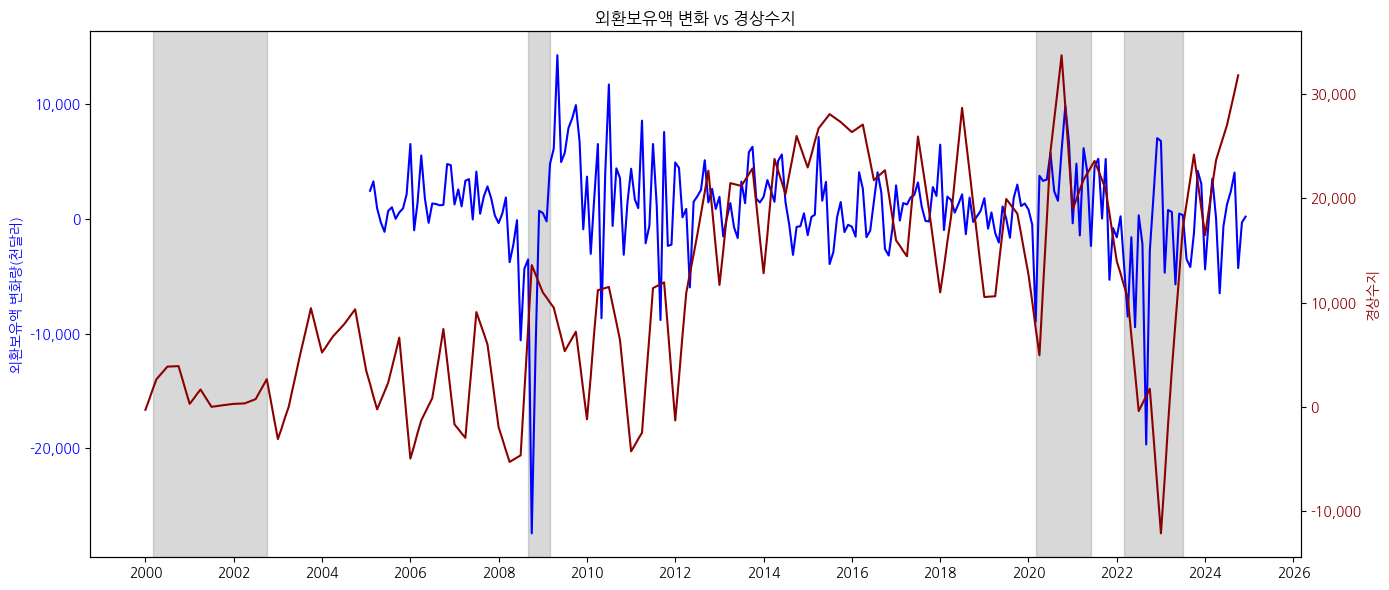

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr_g7 = df[["ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ", "Ïô∏ÌôòÎ≥¥Ïú†Ïï°_Î≥ÄÌôî"]].corr().iloc[0, 1]
print(f"[Í∞ÄÏÑ§ 7] Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôî vs Í≤ΩÏÉÅÏàòÏßÄ ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr_g7:.3f}")

# ÏãúÍ≥ÑÏó¥ ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(14, 6))

# Ï¢åÏ∏° Ï∂ï: Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâ
ax1.plot(df['TIME'], df["Ïô∏ÌôòÎ≥¥Ïú†Ïï°_Î≥ÄÌôî"], color='blue', label='Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâ')
ax1.set_ylabel('Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâ(Ï≤úÎã¨Îü¨)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))  # Ï≤úÎã®ÏúÑ ÏΩ§Îßà

# xÏ∂ï ÏÑ§Ï†ï
ax1.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Ïö∞Ï∏° Ï∂ï: Í≤ΩÏÉÅÏàòÏßÄ
ax2 = ax1.twinx()
ax2.plot(df['TIME'], df["ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ"], color='darkred', label='Í≤ΩÏÉÅÏàòÏßÄ')
ax2.set_ylabel('Í≤ΩÏÉÅÏàòÏßÄ', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))  # Ï≤úÎã®ÏúÑ ÏΩ§Îßà

# üéØ Ïù¥Î≤§Ìä∏ Íµ¨Í∞Ñ ÌöåÏÉâ ÏùåÏòÅ Ï∂îÍ∞Ä
event_periods = [
    ('2000-03', '2002-10'),  # Îã∑Ïª¥ Î≤ÑÎ∏î
    ('2008-09', '2009-03'),  # Í∏ÄÎ°úÎ≤å Í∏àÏúµ ÏúÑÍ∏∞
    ('2020-03', '2021-06'),  # ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπ
    ('2022-03', '2023-07'),  # ÏûêÏù¥Ïñ∏Ìä∏ Ïä§ÌÖù
]

for start, end in event_periods:
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='gray', alpha=0.3)

# Ï†úÎ™© Î∞è Î†àÏù¥ÏïÑÏõÉ
plt.title("Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôî vs Í≤ΩÏÉÅÏàòÏßÄ")
plt.tight_layout()
plt.show()

[Í∞ÄÏÑ§ 7] ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.026, ÏñëÏ∏° p-value: 0.6906


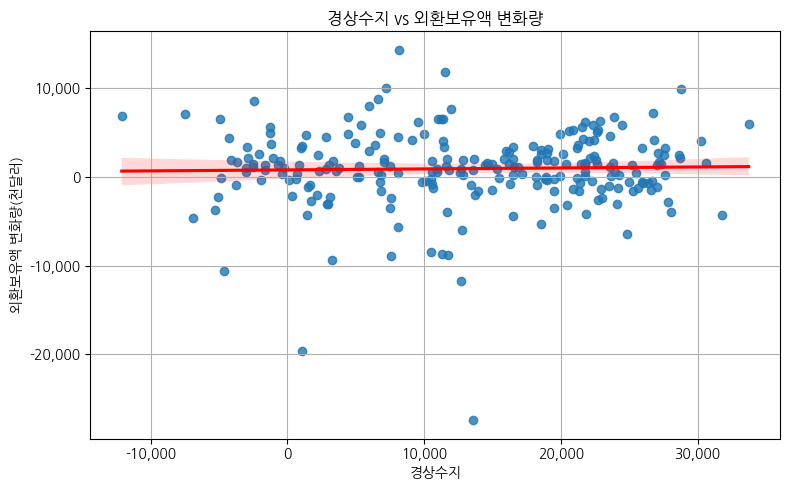

In [27]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Î∂ÑÏÑùÏö© Î≥ÄÏàò ÏÑ†ÌÉù
subset = df[['ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ', 'Ïô∏ÌôòÎ≥¥Ïú†Ïï°_Î≥ÄÌôî']].dropna()
x = subset['ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ']
y = subset['Ïô∏ÌôòÎ≥¥Ïú†Ïï°_Î≥ÄÌôî']

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∞è p-value Í≥ÑÏÇ∞ (ÏñëÏ∏°)
corr, pval = pearsonr(x, y)
print(f"[Í∞ÄÏÑ§ 7] ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr:.3f}, ÏñëÏ∏° p-value: {pval:.4f}")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.title("Í≤ΩÏÉÅÏàòÏßÄ vs Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâ")
plt.xlabel("Í≤ΩÏÉÅÏàòÏßÄ")
plt.ylabel("Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâ(Ï≤úÎã¨Îü¨)")

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.grid(True)
plt.tight_layout()
plt.show()

‚ñ∫ Í≤ΩÏÉÅÏàòÏßÄ ÌùëÏûêÍ∞Ä Í≥ß Ïô∏ÌôòÎ≥¥Ïú†Ïï° Ï¶ùÍ∞ÄÎ°ú Ïù¥Ïñ¥ÏßÄÎäî ÏßÅÏ†ëÏ†Å Ïó∞Í¥ÄÏÑ±ÏùÄ ÌôïÏù∏ÎêòÏßÄ ÏïäÏïòÏúºÎ©∞,
Ïô∏ÌôòÎ≥¥Ïú†Ïï°Ïùò Î≥ÄÌôîÎäî Î¨¥Ïó≠ÌùëÏûê Ïô∏ÏóêÎèÑ ÌôòÏú® Í∞úÏûÖ, Ïô∏Ïûê Ïú†Ï∂úÏûÖ, ÌèâÍ∞ÄÏÜêÏùµ Îì± Î≥µÌï©Ï†ÅÏù∏ ÏöîÏù∏Ïùò ÏòÅÌñ•ÏùÑ Î∞õÎäî Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÌï† Ïàò ÏûàÎã§.

Ïô∏ÌôòÎ≥¥Ïú†Ïï°Ïùò Ï¶ùÍ∞ÄÍ∞Ä Ìà¨ÏûêÏôÄ Í¥ÄÎ†®Ïù¥ ÏóÜÏñ¥ Í≤ΩÏÉÅÏàòÏßÄÏôÄ Î∂ÑÏÑùÌñàÏúºÎÇò Í∏∞ÎåÄÏôÄ Îã¨Î¶¨ Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥ÑÍ∞Ä ÏóÜÏóàÎã§

## **[Í∞ÄÏÑ§4] Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâÏù¥ Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù Ïõê/Îã¨Îü¨ ÌôòÏú®ÏùÄ ÌïòÎùΩÌï† Í≤ÉÏù¥Îã§.**

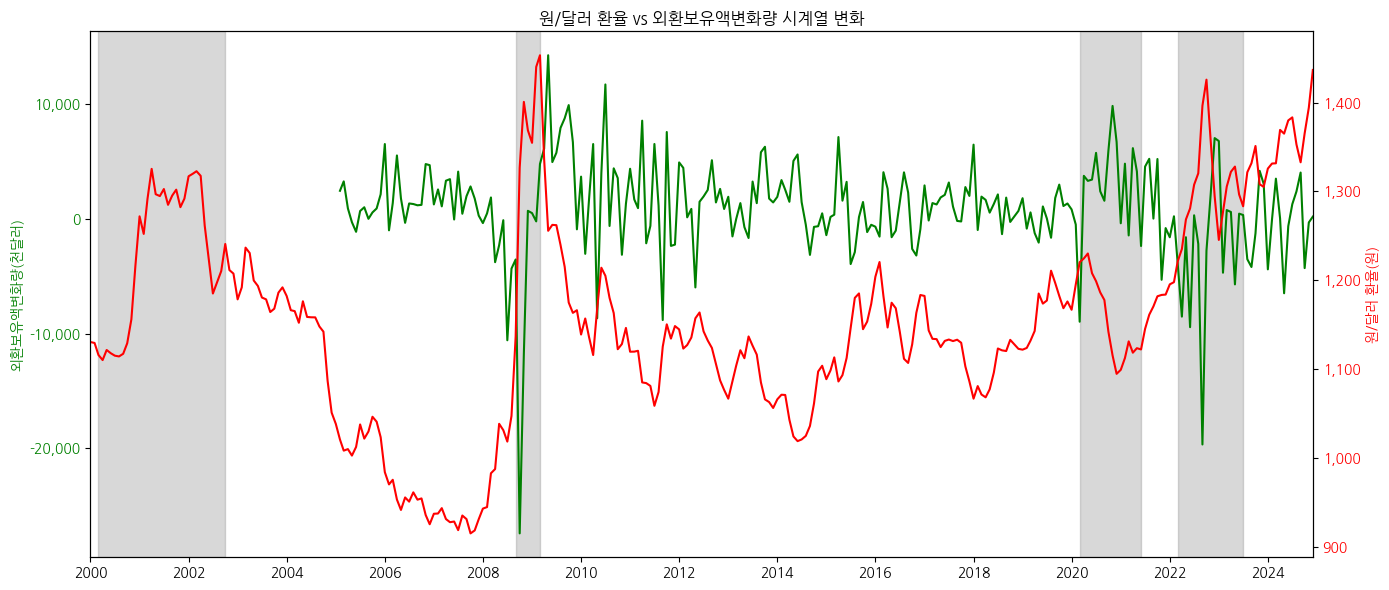

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.ticker import FuncFormatter

# ‚úÖ Ïù¥Î≤§Ìä∏ Í∏∞Í∞ÑÎßå ÏÑ§Ï†ï (ÎùºÎ≤® ÏóÜÏùå)
event_periods = [
    ('2000-03', '2002-10'),  # Îã∑Ïª¥ Î≤ÑÎ∏î
    ('2008-09', '2009-03'),  # Í∏ÄÎ°úÎ≤å Í∏àÏúµÏúÑÍ∏∞
    ('2020-03', '2021-06'),  # ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπ
    ('2022-03', '2023-07'),  # ÏûêÏù¥Ïñ∏Ìä∏ Ïä§ÌÖù
]

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
fig, ax1 = plt.subplots(figsize=(14, 6))

# ÏôºÏ™Ω Ï∂ï: Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâ
ax1.plot(df['TIME'], df['Ïô∏ÌôòÎ≥¥Ïú†Ïï°_Î≥ÄÌôî'], color='green', label='Ïô∏ÌôòÎ≥¥Ïú†Ïï°Î≥ÄÌôîÎüâ(Ï≤úÎã¨Îü¨)')
ax1.set_ylabel('Ïô∏ÌôòÎ≥¥Ïú†Ïï°Î≥ÄÌôîÎüâ(Ï≤úÎã¨Îü¨)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Ïò§Î•∏Ï™Ω Ï∂ï: Ïõê/Îã¨Îü¨ ÌôòÏú®
ax2 = ax1.twinx()
ax2.plot(df['TIME'], df['Ïõê/Îã¨Îü¨ÌôòÏú®'], color='red', label='Ïõê/Îã¨Îü¨ÌôòÏú®')
ax2.set_ylabel('Ïõê/Îã¨Îü¨ ÌôòÏú®(Ïõê)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))

# üéØ ÌöåÏÉâ ÏùåÏòÅÎßå ÌëúÏãú
for start, end in event_periods:
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='gray', alpha=0.3)

# xÏ∂ï ÏÑ§Ï†ï
ax1.set_xlim([df['TIME'].min(), df['TIME'].max()])
ax1.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Ï†úÎ™©
plt.title("Ïõê/Îã¨Îü¨ ÌôòÏú® vs Ïô∏ÌôòÎ≥¥Ïú†Ïï°Î≥ÄÌôîÎüâ ÏãúÍ≥ÑÏó¥ Î≥ÄÌôî")
plt.tight_layout()
plt.show()


[Í∞ÄÏÑ§ 4] ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.205, ÏñëÏ∏° p-value: 0.0014


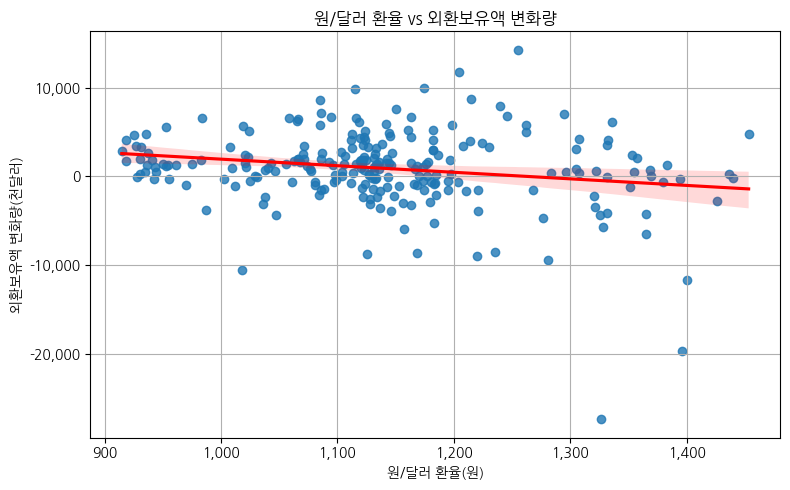

In [28]:
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú Î≥ÄÏàò: Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâ, Ïõê/Îã¨Îü¨ ÌôòÏú®
subset = df[['Ïô∏ÌôòÎ≥¥Ïú†Ïï°_Î≥ÄÌôî', 'Ïõê/Îã¨Îü¨ÌôòÏú®']].dropna()
x = subset['Ïõê/Îã¨Îü¨ÌôòÏú®']
y = subset['Ïô∏ÌôòÎ≥¥Ïú†Ïï°_Î≥ÄÌôî']

# ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∞è ÏñëÏ∏° p-value Í≥ÑÏÇ∞
corr, pval = pearsonr(x, y)
print(f"[Í∞ÄÏÑ§ 4] ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr:.3f}, ÏñëÏ∏° p-value: {pval:.4f}")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.title("Ïõê/Îã¨Îü¨ ÌôòÏú® vs Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâ")
plt.xlabel("Ïõê/Îã¨Îü¨ ÌôòÏú®(Ïõê)")
plt.ylabel("Ïô∏ÌôòÎ≥¥Ïú†Ïï° Î≥ÄÌôîÎüâ(Ï≤úÎã¨Îü¨)")
plt.grid(True)

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.tight_layout()
plt.show()

 ‚ñ∫ Ïù¥Îäî Ïô∏ÌôòÎ≥¥Ïú†Ïï°Ïù¥ Ï¶ùÍ∞ÄÌï† Í≤ΩÏö∞ ÏõêÌôîÍ∞Ä Í∞ïÏÑ∏Î•º Î≥¥Ïù¥Î©∞ ÌôòÏú®Ïù¥ ÌïòÎùΩÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§.
Îã§Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàòÏùò Ï†àÎåìÍ∞íÏù¥ ÌÅ¨ÏßÄ ÏïäÏïÑ, ÏòÅÌñ•Î†•ÏùÄ Ï†úÌïúÏ†ÅÏúºÎ°ú Ìï¥ÏÑùÎêúÎã§.

ÎòêÌïú ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÏÇ¥Ìé¥Î≥¥Î©¥, Ïô∏ÌôòÎ≥¥Ïú†Ïï°Ïù¥ ÌÅ¨Í≤å Í∞êÏÜåÌïòÎäî ÏãúÍ∏∞ÏóêÎäî ÌôòÏú®Ïù¥ Í∏âÎì±ÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏùºÎ∂Ä ÎÇòÌÉÄÎÇ¨ÏúºÎ©∞,
Ïù¥Îäî Ïô∏ÌôòÎ≥¥Ïú†Ïï°Ïù¥ ÌôòÏú® Î∞©Ïñ¥ ÏàòÎã®ÏúºÎ°ú ÏûëÎèôÌïòÍ≥† ÏûàÏùåÏùÑ Î≥¥Ïó¨Ï£ºÎäî ÏßÄÌëúÎ°ú Î≥º Ïàò ÏûàÎã§.

# [Ï∂îÍ∞ÄÌîÑÎ°úÏ†ùÌä∏] ÏúÑÍ∏∞ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌôúÏö© ÎåÄÏùë Î∞©Ïïà Ï†úÏïà

In [39]:
# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Î≥¥Í∞Ñ
df = df.interpolate(method='linear')
df = df.fillna(method='ffill').fillna(method='bfill')

<ipython-input-39-a8a633bef2ea>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


## Ïú†ÏùòÎØ∏Ìïú ÏÜåÏàòÍ∏∞Î∞ò ÌîºÏ≤ò

In [40]:
# Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàò
selected_features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
                        'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò',
                        'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†','M2',
                        'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©',
                        'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']

### Î≥ÄÌôîÎüâ Ï§ëÏã¨ÏúºÎ°ú ÌîºÏ≤ò ÏÉùÏÑ±

In [41]:
# 1. Î≥ÄÌôîÎüâ(diff) Ï†ÅÏö©
X_diff = df[selected_features].diff().dropna()

# 2. Ïä§ÏºÄÏùºÎßÅ
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_diff)

# 3. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

# 4. Í≤∞Í≥º Ï∂îÍ∞Ä (dropnaÎêú X_diffÏùò Ïù∏Îç±Ïä§Î•º ÏÇ¨Ïö©)
df_diff = df.loc[X_diff.index].copy()
df_diff['Cluster'] = clusters

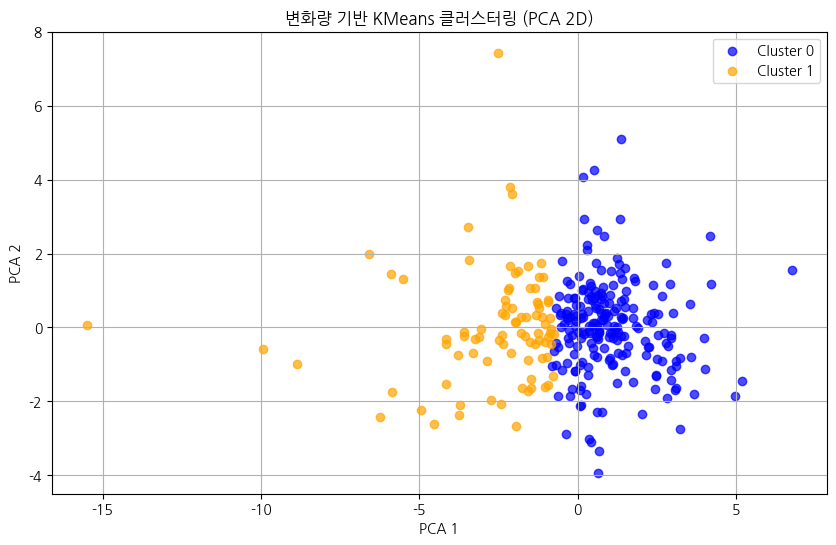

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. PCAÎ°ú 2D Ï∂ïÏÜå
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. ÏãúÍ∞ÅÌôî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï§ÄÎπÑ
df_plot = df_diff.copy()
df_plot['PCA1'] = X_pca[:, 0]
df_plot['PCA2'] = X_pca[:, 1]


# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))

colors = {0: 'blue', 1: 'orange'}
for cluster_label in df_plot['Cluster'].unique():
    subset = df_plot[df_plot['Cluster'] == cluster_label]
    plt.scatter(subset['PCA1'], subset['PCA2'],
                label=f'Cluster {cluster_label}', alpha=0.7, c=colors[cluster_label])

plt.title('Î≥ÄÌôîÎüâ Í∏∞Î∞ò KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()

* Ïú†ÏùòÎØ∏Ìïú ÌîºÏ≤òÎì§Î°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌñàÏùÑ ÎñÑ


| Ïù¥Î≤§Ìä∏           | Í∏∞Í∞Ñ                          | Ï¥ù Í¥ÄÏ∏°Ïπò Ïàò | Cluster 0 Ïàò | Cluster 0 ÎπÑÏú® |
|------------------|-------------------------------|--------------|----------------|-----------------|
| Îã∑Ïª¥ Î≤ÑÎ∏î        | 2000-03-01 ~ 2002-10-31       | 32           | 25             | 0.78            |
| Í∏ÄÎ°úÎ≤å Í∏àÏúµÏúÑÍ∏∞  | 2008-09-01 ~ 2009-03-31       | 7            | 2              | 0.29            |
| ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπ    | 2020-03-01 ~ 2021-06-30       | 16           | 13             | 0.81            |
| ÏûêÏù¥Ïñ∏Ìä∏ Ïä§ÌÖù    | 2022-03-01 ~ 2023-07-31       | 17           | 7              | 0.41            |


| Ïù¥Î≤§Ìä∏          | Cluster 0 ÎπÑÏú® | Ìï¥ÏÑù                                   |
| ------------ | ------------ | ------------------------------------ |
| **Îã∑Ïª¥ Î≤ÑÎ∏î**    | **0.78**     | ‚úîÔ∏è ÎåÄÎ∂ÄÎ∂ÑÏùò ÏãúÏ†êÏóêÏÑú Î∂àÏïàÏ†ïÌïú Î≥ÄÌôî Í∞êÏßÄ (ÏúÑÍ∏∞ Ïûò Ìè¨Ï∞©)    |
| **Í∏ÄÎ°úÎ≤å Í∏àÏúµÏúÑÍ∏∞** | **0.29**     | ‚ö†Ô∏è ÏùºÎ∂ÄÎßå Í∞êÏßÄÎê® (ÏßßÏùÄ Í∏∞Í∞Ñ, ÏúÑÍ∏∞ Î∞òÏòÅÏù¥ ÏïΩÌï®)        |
| **ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπ**  | **0.81**     | ‚úîÔ∏è Îß§Ïö∞ ÎÜíÏùÄ ÎπÑÏú®, Ìå®ÎãâÏ†Å Î≥ÄÌôî Ïûò Ìè¨Ï∞©             |
| **ÏûêÏù¥Ïñ∏Ìä∏ Ïä§ÌÖù**  | **0.41**     | ‚ö†Ô∏è Î∞òÎ∞ò Ï†ïÎèÑ Ìè¨Ï∞© (ÏãúÏû• Ï∂©Í≤©Ïù¥ Ï†êÏßÑÏ†ÅÏù¥ÏóàÎçò ÏòÅÌñ•Ïùº Ïàò ÏûàÏùå) |

      [Í≤∞Í≥º]

      Cluster 0ÏùÄ ÌÅ¨Í≥† Í∏âÍ≤©Ìïú Î≥ÄÌôîÎüâÏù¥ Î∞úÏÉùÌïòÎäî Î∂àÏïàÏ†ï Íµ¨Í∞ÑÏùÑ Ïûò Ïû°Í≥† ÏûàÏùå.
      ÌäπÌûà Îã∑Ïª¥ Î≤ÑÎ∏î, ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπÏùÄ ÎÜíÏùÄ ÎπÑÏú®Î°ú Ïûò Ìè¨Ï∞©Îê®.
      Í∏àÏúµÏúÑÍ∏∞, ÏûêÏù¥Ïñ∏Ìä∏Ïä§ÌÖùÏùÄ ÏùºÎ∂Ä Íµ¨Í∞ÑÎßå Ïû°Ìûò ‚Üí Íµ¨Ï°∞Ï†ÅÏúºÎ°ú ÏßßÍ±∞ÎÇò Î≥ÄÎèôÏÑ±Ïù¥ ÏùºÏ†ïÌïú Ìå®ÌÑ¥Ïùº ÏàòÎèÑ ÏûàÏùå.
      ‚Üí Ïù¥Í±¥ Î≥ÄÌôîÎüâ Í∏∞Ï§Ä ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùò ÌïúÍ≥Ñ ÎòêÎäî ÏãúÏû• Î∞òÏùëÏùò ÏôÑÌôîÎ°ú Ìï¥ÏÑù Í∞ÄÎä•


‚ñ∫ Cluster 0ÏùÄ Î≥ÄÌôîÎüâÏù¥ ÌÅ∞ Î∂àÏïàÏ†ï Íµ¨Í∞ÑÏùÑ ÎåÄÌëúÌïòÎ©∞,
ÌäπÌûà Îã∑Ïª¥ Î≤ÑÎ∏î(78%)Í≥º ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπ(81%) ÏãúÍ∏∞ÏóêÎäî ÎÜíÏùÄ ÎπÑÏú®Î°ú Îì±Ïû•Ìï¥ Í∏âÎ≥ÄÌïòÎäî Í≤ΩÏ†ú ÌôòÍ≤ΩÏùÑ ÎØºÍ∞êÌïòÍ≤å Ìè¨Ï∞©ÌñàÎã§.

Î∞òÎ©¥, Í∏àÏúµÏúÑÍ∏∞(29%)ÏôÄ ÏûêÏù¥Ïñ∏Ìä∏ Ïä§ÌÖù(41%)ÏóêÏÑúÎäî ÏùºÎ∂ÄÎßå Í∞êÏßÄÎêòÏñ¥, Ï†êÏßÑÏ†Å Î≥ÄÌôîÎÇò Ï†ïÏ±Ö Í∞úÏûÖ ÏòÅÌñ•ÏúºÎ°ú Î≥ÄÌôîÎüâÏù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îçú ÌëúÌòÑÎêú Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÌï† Ïàò ÏûàÎã§.

### Ïú†ÏùòÎØ∏Ìïú ÏÜåÏàò ÌîºÏ≤ò Í∏∞Î∞ò p-value Í≤ÄÏ†ï ÏΩîÎìú Ïú†ÏùòÏÑ±Í≤ÄÏ†ï

- t-test p-value < 0.05 ÎòêÎäî Mann-Whitney p-value < 0.05Ïù¥Î©¥ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥

- Cluster 0Ïùò ÌèâÍ∑†Ïù¥ **Îçî ÎÇòÏÅòÎã§ (Í∞êÏÜå or Ï¶ùÍ∞Ä)**Î©¥ ‚Üí Ìï¥Îãπ Î≥ÄÏàòÎäî ÏúÑÍ∏∞ Íµ¨Í∞ÑÏóêÏÑú ÎØºÍ∞êÌïòÍ≤å Î∞òÏùëÌïú ÏßÄÌëú

In [43]:
from scipy.stats import ttest_ind, mannwhitneyu
import pandas as pd

# selected_features: ÏÜåÏàò Î≥ÄÏàò Î¶¨Ïä§Ìä∏
selected_features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
                     'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò',
                     'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†','M2',
                     'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©',
                     'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']

# df_diff: Î≥ÄÌôîÎüâ + ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï†ïÎ≥¥ Ìè¨Ìï®Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# 'Cluster' Ïª¨Îüº: 0 or 1

def compare_clusters(df, selected_features):
    results = []

    for col in selected_features:
        # 1. Í∞Å Î≥ÄÏàòÎ≥ÑÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ 0Í≥º 1Í∞í Î∂ÑÎ¶¨
        group_0 = df[df['Cluster'] == 0][col].dropna()
        group_1 = df[df['Cluster'] == 1][col].dropna()

        # 2. Îëê Í∑∏Î£πÍ∞ÑÏùò ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÌïúÏßÄ ÌôïÏù∏ (t-test)
        t_stat, t_p = ttest_ind(group_0, group_1, equal_var=False)

        # ÎπÑÎ™®Ïàò Í≤ÄÏ†ï (Mann-Whitney U test)
        u_stat, u_p = mannwhitneyu(group_0, group_1, alternative='two-sided')

        #  Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ïÏù¥ Ïñ¥Î†§Ïö¥ Í≤ΩÏö∞Î•º ÎåÄÎπÑÌïú ÎπÑÎ™®Ïàò Í≤ÄÏ†ï # Í≤∞Í≥ºÎäî ÌèâÍ∑†Í∞í, t-test, ÎπÑÎ™®Ïàò Í≤ÄÏ†ïÏùò p-valueÍπåÏßÄ Î™®Îëê ÏàòÎ°ù
        results.append({
            'Î≥ÄÏàò': col,
            'Cluster 0 ÌèâÍ∑†': group_0.mean(),
            'Cluster 1 ÌèâÍ∑†': group_1.mean(),
            't-test p-value': round(t_p, 4),
            'Mann-Whitney p-value': round(u_p, 4)
        })

    return pd.DataFrame(results)

# Ïã§Ìñâ
result_small_features = compare_clusters(df_diff, selected_features)

# Í≤∞Í≥º ÌÖåÏù¥Î∏î Î≥¥Í∏∞
pd.set_option('display.max_rows', None)  # ÌïÑÏöîÏãú Ï†ÑÏ≤¥ Ìñâ Î≥¥Í∏∞
pd.set_option('display.max_columns', None)
display(result_small_features)

# ÎòêÎäî Í∞ÑÎã®Ìûà
# print(result_small_features)

Î≥ÄÏàò  Cluster 0 ÌèâÍ∑†  Cluster 1 ÌèâÍ∑†  t-test p-value  \
0    Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò  1.011526e+02  9.779884e+01          0.0110   
1   ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°  3.058692e+05  3.330613e+05          0.0134   
2         vix  1.881254e+01  2.265116e+01          0.0017   
3      WTI Ïú†Í∞Ä  6.199714e+01  6.825942e+01          0.0566   
4      ÌïúÍµ≠ Ïã§ÏóÖÎ•†  3.538967e+00  3.394186e+00          0.0104   
5      ÎëêÎ∞îÏù¥ Ïú†Í∞Ä  6.196446e+01  7.091430e+01          0.0136   
6    Brent Ïú†Í∞Ä  6.458606e+01  7.323663e+01          0.0194   
7     Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©  4.454460e+00  4.128605e+00          0.2065   
8      Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©  8.787277e+01  1.174856e+02          0.0088   
9     ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò  9.198216e+01  9.867326e+01          0.1260   
10  ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®  2.477384e+00  2.702588e+00          0.2529   
11   Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞® -8.174540e-03 -1.450785e-01          0.4451   
12   Ïã§ÏßàGDPÏÑ±Ïû•Î•†  3.718271e+00 -1.541147e-02          0.0000   
13         M2  1.907252e+03  2.216399e+03          0.0170   
14       Í∏à Í∞ÄÍ≤©  1.079134e+03  1.285475e+03          0.0051   
15      Íµ¨Î¶¨ Í∞ÄÍ≤©  5.781570e+03  6.425027e+03          0.0335   
16      ÏïÑÏó∞ Í∞ÄÍ≤©  2.083877e+03  2.228138e+03          0.1684   
17    ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©  1.979574e+03  2.036389e+03          0.3157   
18      ÎãàÏºà Í∞ÄÍ≤©  1.616051e+04  1.656129e+04          0.6622   
19  Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°  4.369158e+06  4.981516e+06          0.0392   

    Mann-Whitney p-value  
0                 0.0135  
1                 0.0243  
2                 0.0038  
3                 0.0538  
4                 0.0076  
5                 0.0160  
6                 0.0219  
7                 0.3164  
8                 0.0020  
9                 0.0784  
10                0.4568  
11                0.6570  
12                0.0000  
13                0.0105  
14                0.0222  
15                0.0966  
16                0.2897  
17                0.2035  
18                0.3062  
19                0.0230

## Í∞ÄÏÑ§ÏùÑ ÏÑ∏Ïö¥ Î™®Îì† Î≥ÄÏàò Í∏∞Î∞ò ÌîºÏ≤ò

In [44]:
# Î≥ÄÏàò Ï†ïÏùò
features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÎØ∏Íµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°',
            'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎØ∏Íµ≠ Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'WTI Ïú†Í∞Ä', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
            'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©',
            'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Í∏à Í∞ÄÍ≤©', 'ÎåÄÎëê Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°',
            'Ïò•ÏàòÏàò Í∞ÄÍ≤©', 'ÏÜåÎß• Í∞ÄÍ≤©', 'ÏõêÎãπ Í∞ÄÍ≤©', 'ÏõêÎ©¥ Í∞ÄÍ≤©',
            'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®',
            'M2', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'vix']

### Î≥ÄÌôîÎüâ Ï§ëÏã¨ÏúºÎ°ú ÌîºÏ≤ò ÏÉùÏÑ±

In [45]:
# 1. Î≥ÄÌôîÎüâ(diff) Ï†ÅÏö©
X_diff = df[features].diff().dropna()

# 2. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_diff)

# 3. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 4. ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Ï∂îÍ∞Ä
df_diff = df.loc[X_diff.index].copy()
df_diff['Cluster'] = clusters

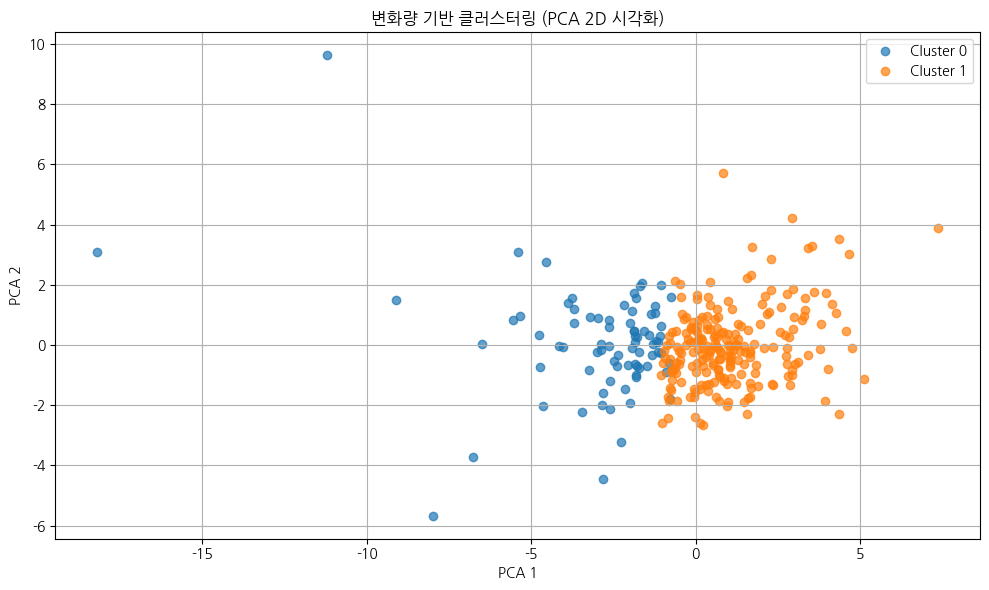

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 5. PCAÎ°ú 2D Ï∂ïÏÜå
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 6. Í≤∞Í≥º DataFrameÏóê PCA Í≤∞Í≥º Ï∂îÍ∞Ä
df_diff['PCA1'] = X_pca[:, 0]
df_diff['PCA2'] = X_pca[:, 1]

# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
colors = {0: 'tab:blue', 1: 'tab:orange'}

for cluster_label in sorted(df_diff['Cluster'].unique()):
    subset = df_diff[df_diff['Cluster'] == cluster_label]
    plt.scatter(subset['PCA1'], subset['PCA2'],
                label=f'Cluster {cluster_label}',
                alpha=0.7,
                color=colors[cluster_label])

plt.title('Î≥ÄÌôîÎüâ Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (PCA 2D ÏãúÍ∞ÅÌôî)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


| Ïù¥Î≤§Ìä∏           | Í∏∞Í∞Ñ                          | Ï¥ù Í¥ÄÏ∏°Ïπò Ïàò | Cluster 0 Ïàò | Cluster 0 ÎπÑÏú® |
|------------------|-------------------------------|--------------|----------------|-----------------|
| Îã∑Ïª¥ Î≤ÑÎ∏î        | 2000-03-01 ~ 2002-10-31       | 32           | 6              | 0.19            |
| Í∏ÄÎ°úÎ≤å Í∏àÏúµÏúÑÍ∏∞  | 2008-09-01 ~ 2009-03-31       | 7            | 5              | 0.71            |
| ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπ    | 2020-03-01 ~ 2021-06-30       | 16           | 2              | 0.12            |
| ÏûêÏù¥Ïñ∏Ìä∏ Ïä§ÌÖù    | 2022-03-01 ~ 2023-07-31       | 17           | 9              | 0.53            |




### Ï†ÑÏ≤¥Î≥ÄÏàò ÌîºÏ≤ò Í∏∞Î∞ò p-value Í≤ÄÏ†ï ÏΩîÎìú Ïú†ÏùòÏÑ±Í≤ÄÏ†ï

In [47]:
from scipy.stats import ttest_ind, mannwhitneyu
import pandas as pd

# Î≥ÄÏàò Ï†ïÏùò
features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÎØ∏Íµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°',
            'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎØ∏Íµ≠ Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'WTI Ïú†Í∞Ä', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
            'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©',
            'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Í∏à Í∞ÄÍ≤©', 'ÎåÄÎëê Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°',
            'Ïò•ÏàòÏàò Í∞ÄÍ≤©', 'ÏÜåÎß• Í∞ÄÍ≤©', 'ÏõêÎãπ Í∞ÄÍ≤©', 'ÏõêÎ©¥ Í∞ÄÍ≤©',
            'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®',
            'M2', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'vix']

# df_diff: Î≥ÄÌôîÎüâ + ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï†ïÎ≥¥ Ìè¨Ìï®Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# 'Cluster' Ïª¨Îüº: 0 or 1

def compare_clusters(df, features):
    results = []

    for col in features:
        # 1. Í∞Å Î≥ÄÏàòÎ≥ÑÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ 0Í≥º 1Í∞í Î∂ÑÎ¶¨
        group_0 = df[df['Cluster'] == 0][col].dropna()
        group_1 = df[df['Cluster'] == 1][col].dropna()

        # 2. Îëê Í∑∏Î£πÍ∞ÑÏùò ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÌïúÏßÄ ÌôïÏù∏ (t-test)
        t_stat, t_p = ttest_ind(group_0, group_1, equal_var=False)

        # ÎπÑÎ™®Ïàò Í≤ÄÏ†ï (Mann-Whitney U test)
        u_stat, u_p = mannwhitneyu(group_0, group_1, alternative='two-sided')

        #  Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ïÏù¥ Ïñ¥Î†§Ïö¥ Í≤ΩÏö∞Î•º ÎåÄÎπÑÌïú ÎπÑÎ™®Ïàò Í≤ÄÏ†ï # Í≤∞Í≥ºÎäî ÌèâÍ∑†Í∞í, t-test, ÎπÑÎ™®Ïàò Í≤ÄÏ†ïÏùò p-valueÍπåÏßÄ Î™®Îëê ÏàòÎ°ù
        results.append({
            'Î≥ÄÏàò': col,
            'Cluster 0 ÌèâÍ∑†': group_0.mean(),
            'Cluster 1 ÌèâÍ∑†': group_1.mean(),
            't-test p-value': round(t_p, 4),
            'Mann-Whitney p-value': round(u_p, 4)
        })

    return pd.DataFrame(results)

# Ïã§Ìñâ
result_small_features = compare_clusters(df_diff, selected_features)

# Í≤∞Í≥º ÌÖåÏù¥Î∏î Î≥¥Í∏∞
pd.set_option('display.max_rows', None)  # ÌïÑÏöîÏãú Ï†ÑÏ≤¥ Ìñâ Î≥¥Í∏∞
pd.set_option('display.max_columns', None)
display(result_small_features)

# ÎòêÎäî Í∞ÑÎã®Ìûà
# print(result_small_features)

Î≥ÄÏàò  Cluster 0 ÌèâÍ∑†  Cluster 1 ÌèâÍ∑†  t-test p-value  \
0    Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò  9.796329e+01  1.009868e+02          0.0286   
1   ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°  3.304112e+05  3.076860e+05          0.0438   
2         vix  2.320494e+01  1.873582e+01          0.0006   
3      WTI Ïú†Í∞Ä  6.938076e+01  6.179373e+01          0.0249   
4      ÌïúÍµ≠ Ïã§ÏóÖÎ•†  3.374684e+00  3.541364e+00          0.0031   
5      ÎëêÎ∞îÏù¥ Ïú†Í∞Ä  7.195038e+01  6.187718e+01          0.0069   
6    Brent Ïú†Í∞Ä  7.437810e+01  6.445141e+01          0.0091   
7     Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©  4.240506e+00  4.403909e+00          0.5419   
8      Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©  1.206091e+02  8.769336e+01          0.0061   
9     ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò  9.795190e+01  9.245409e+01          0.2242   
10  ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®  2.724679e+00  2.476617e+00          0.2273   
11   Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞® -1.635510e-01 -5.897241e-03          0.3940   
12   Ïã§ÏßàGDPÏÑ±Ïû•Î•† -1.909686e-01  3.662513e+00          0.0000   
13         M2  2.194924e+03  1.924800e+03          0.0425   
14       Í∏à Í∞ÄÍ≤©  1.284980e+03  1.085877e+03          0.0086   
15      Íµ¨Î¶¨ Í∞ÄÍ≤©  6.484229e+03  5.780785e+03          0.0227   
16      ÏïÑÏó∞ Í∞ÄÍ≤©  2.228133e+03  2.088469e+03          0.1946   
17    ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©  2.054614e+03  1.974837e+03          0.1731   
18      ÎãàÏºà Í∞ÄÍ≤©  1.693006e+04  1.604084e+04          0.3450   
19  Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°  4.961994e+06  4.395652e+06          0.0654   

    Mann-Whitney p-value  
0                 0.0308  
1                 0.0675  
2                 0.0006  
3                 0.0221  
4                 0.0034  
5                 0.0072  
6                 0.0095  
7                 0.6821  
8                 0.0011  
9                 0.1784  
10                0.3960  
11                0.5465  
12                0.0000  
13                0.0289  
14                0.0309  
15                0.0611  
16                0.3575  
17                0.1090  
18                0.1127  
19                0.0488

## Îëê Í≤∞Í≥º ÎπÑÍµê

| Ïù¥Î≤§Ìä∏      | Í∏∞Ï°¥ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (ÏÜåÏàò Î≥ÄÏàò) | ÌôïÏû• Î≥ÄÏàò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ |
| -------- | ---------------- | ----------- |
| Îã∑Ïª¥ Î≤ÑÎ∏î    | **0.78**         | **0.19**    |
| Í∏ÄÎ°úÎ≤å Í∏àÏúµÏúÑÍ∏∞ | 0.29             | **0.71**    |
| ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπ  | **0.81**         | 0.12        |
| ÏûêÏù¥Ïñ∏Ìä∏ Ïä§ÌÖù  | 0.41             | **0.53**    |


ÏÜåÏàò Î≥ÄÏàò Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÄ Í∞êÎèÑ ÎÜíÍ≥† ÎÇ†Ïπ¥Î°≠Í≤å ÏùºÎ∂Ä ÏúÑÍ∏∞Î•º Ìè¨Ï∞©Ìï® (ex. ÏΩîÎ°úÎÇò, Îã∑Ïª¥)

ÌôïÏû• Î≥ÄÏàò Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÄ Í∏àÏúµ ÏãúÏä§ÌÖú Ï†ÑÎ∞òÏùò Ï∂©Í≤©Ïù¥ Î∞òÏòÅÎêú ÏúÑÍ∏∞ (Í∏ÄÎ°úÎ≤å Í∏àÏúµÏúÑÍ∏∞, ÏûêÏù¥Ïñ∏Ìä∏Ïä§ÌÖù)Ïóê Îçî Í∞ïÌï®

Ï¶â,
Í∞êÎèÑ ÎÜíÏùÄ Ï°∞Í∏∞ ÌÉêÏßÄÎäî ÏÜåÏàò Î≥ÄÏàò
Ï†ÑÎ∞©ÏúÑ Ï∂©Í≤© Í∞êÏßÄÎäî ÌôïÏû• Î≥ÄÏàò
‚Üí ÎëòÏùÑ Î≥¥ÏôÑÏ†ÅÏúºÎ°ú ÌôúÏö©Ìï† Ïàò ÏûàÏùå

    Îëê ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÄ Ïú†ÏÇ¨Ìïú ÏßÄÌëúÍµ∞ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌïòÏßÄÎßå,
    Î≥ÄÏàò Íµ¨ÏÑ±Ïùò Ìè≠Í≥º Í∞ïÏ°∞Ï†êÏóêÏÑú Ï∞®Ïù¥Î•º Î≥¥ÏûÖÎãàÎã§.

    ÏÜåÏàò Î≥ÄÏàò Í∏∞Î∞òÏùÄ ÎØºÍ∞êÎèÑ(Î≥ÄÌôî Í∞êÏßÄ Îä•Î†•) Ï∏°Î©¥ÏóêÏÑú,
    ÌôïÏû• Î≥ÄÏàò Í∏∞Î∞òÏùÄ Ï¢ÖÌï©ÏÑ±(Îã§Ï∏µÏ†Å Î≥ÄÌôî Î∞òÏòÅ) Ï∏°Î©¥ÏóêÏÑú Í∞ïÏ†êÏùÑ Î≥¥ÏûÖÎãàÎã§.

## Í≤∞Î°† Î∞è Ï†úÏïà


| Ïù¥Î≤§Ìä∏           | ÏÜåÏàò ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 ÎπÑÏú® | ÌôïÏû• ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 ÎπÑÏú® | Ìï¥ÏÑù Î∞©Ìñ•       | ÏúÑÍ∏∞ Ïú†Ìòï Î∂ÑÎ•ò    |
|------------------|----------------------|-----------------------|------------------|-------------------|
| Îã∑Ïª¥ Î≤ÑÎ∏î        | 0.78                 | 0.19                  | Ïã¨Î¶¨Ï†Å Î∞òÏùë Í∞ïÌï® | üì¢ Ïã¨Î¶¨ Í∏∞Î∞ò ÏúÑÍ∏∞ |
| Í∏ÄÎ°úÎ≤å Í∏àÏúµÏúÑÍ∏∞  | 0.29                 | 0.71                  | Íµ¨Ï°∞ Î≥ÄÌôî Í∞ïÌï®   | üè¶ Íµ¨Ï°∞ Í∏∞Î∞ò ÏúÑÍ∏∞ |
| ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπ    | 0.81                 | 0.12                  | Í∏âÎ≥ÄÌïú Ïã¨Î¶¨ Î∞òÏùë | üì¢ Ïã¨Î¶¨ Í∏∞Î∞ò ÏúÑÍ∏∞ |
| ÏûêÏù¥Ïñ∏Ìä∏ Ïä§ÌÖù    | 0.41                 | 0.53                  | ÏñëÏ™Ω Î™®Îëê Î∞òÏùë   | ‚ö†Ô∏è Î≥µÌï© ÏúÑÍ∏∞       |



| ÏúÑÍ∏∞ Ïú†Ìòï       | Í≤ΩÎ≥¥ ÏïÑÏù¥ÏΩò        | Î©îÏãúÏßÄ ÏòàÏãú                                                  |
| ----------- | ------------- | ------------------------------------------------------- |
| üì¢ Ïã¨Î¶¨ Í∏∞Î∞ò ÏúÑÍ∏∞ | ‚ÄúÏãúÏû• Ïã¨Î¶¨ Î∂àÏïà Í≤ΩÎ≥¥‚Äù | Í∏àÏúµÏãúÏû• Ïã¨Î¶¨Í∞Ä Í∏âÎ≥ÄÌïòÍ≥† ÏûàÏúºÎ©∞, Ï†ïÏ±ÖÏ†Å Ïã†Î¢∞ ÌöåÎ≥µÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.                    |
| üè¶ Íµ¨Ï°∞ Í∏∞Î∞ò ÏúÑÍ∏∞ | ‚ÄúÏãúÏä§ÌÖú Î¶¨Ïä§ÌÅ¨ Í≤ΩÎ≥¥‚Äù  | Ï£ºÏöî Í±∞ÏãúÏßÄÌëúÏùò Íµ¨Ï°∞Ï†Å Î≥ÄÌôîÍ∞Ä Í∞êÏßÄÎêòÏóàÏäµÎãàÎã§. ÌÜµÌôî¬∑Ïû¨Ï†ïÏ†ïÏ±ÖÏùò Í≥µÏ°∞ ÎåÄÏùëÏù¥ ÏöîÍµ¨Îê©ÎãàÎã§.        |
| ‚ö†Ô∏è Î≥µÌï© ÏúÑÍ∏∞    | ‚ÄúÎ≥µÌï© ÏúÑÍ∏∞ Í≤ΩÎ≥¥‚Äù    | ÏãúÏû• Ïã¨Î¶¨ÏôÄ Í≤ΩÏ†ú ÏãúÏä§ÌÖú Î™®ÎëêÏóêÏÑú Ïù¥ÏÉÅ ÏßïÌõÑÍ∞Ä ÎÇòÌÉÄÎÇòÍ≥† ÏûàÏäµÎãàÎã§. Ï†ÑÎ∞©ÏúÑÏ†Å ÏúÑÍ∏∞ ÎåÄÏùëÏù¥ ÌïÑÏöîÌï©ÎãàÎã§. |

| Í∏∞Ï§Ä                   | ÏÜåÏàò ÌîºÏ≤òÏÖã                   | Ï†ÑÏ≤¥ ÌîºÏ≤òÏÖã             |
| -------------------- | ------------------------ | ------------------ |
| **Ìå®ÎãâÍ∏∞ (VIX‚Üë, GDP‚Üì)** | **Î∂àÎ™ÖÌôï** (VIX ÎÇÆÍ±∞ÎÇò GDP ÎÜíÏùå) | ‚úÖ Î™ÖÌôïÌûà Ìè¨Ï∞©           |
| **Ï†ïÏ±Ö ÎåÄÏùë (M2‚Üë, Í∏à‚Üë)**  | Î∂ÄÎ∂Ñ Ìè¨Ï∞©                    | ‚úÖ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í∞ïÌïòÍ≤å Î∞òÏòÅ     |
| **ÏãúÏû• Ï∂©Í≤©/ÏûêÏÇ∞ Í∞ÄÍ≤© Î∞òÏòÅ**   | Ïú†Í∞Ä, Ïô∏Ìôò Îì± Íµ¨Ï°∞ Î∞òÏùëÎßå          | ‚úÖ Í∏à, Ïú†Ïó∞ÌÉÑ, Íµ¨Î¶¨ Îì±ÎèÑ Ìè¨Ìï® |
| **Ïã¨Î¶¨ÏßÄÌëú ÏùºÍ¥ÄÏÑ±**         | ÎÜíÍ∏∞ÎèÑ ÌïòÍ≥† ÎÇÆÍ∏∞ÎèÑ Ìï® (Ìï¥ÏÑù ÌòºÎûÄ)     | ‚úÖ ÏúÑÍ∏∞ Íµ¨Í∞ÑÏóêÏÑú Ïã¨Î¶¨ ÌïòÎùΩ ÏùºÍ¥Ä |


<Ï†ÑÏ≤¥ ÌîºÏ≤òÏÖã>

**ÏúÑÍ∏∞ÏùºÏàòÎ°ù ‚Üí GDP ÏÑ±Ïû•Î•† ‚Üì, Ïã¨Î¶¨ÏßÄÏàò ‚Üì, Í∏à Í∞ÄÍ≤© ‚Üë, M2 ‚Üë, Ïã§ÏóÖÎ•† ‚Üë**

Ïù¥Í±¥ Í±∞ÏãúÍ≤ΩÏ†ú Ï†ïÏ±Ö Î∞òÏùëÏù¥ Îî∞ÎùºÎ∂ôÎäî **ÏúÑÍ∏∞Ïùò Ï†ÑÌòïÏ†Å Î™®Ïäµ**

Ï†ïÏ±Ö Í≤∞Ï†ïÏûê ÏûÖÏû•ÏóêÏÑú ÏúÑÍ∏∞Î•º ÏßÑÎã®ÌïòÎäî Îç∞ ÌïÑÏöîÌïú ÏßÄÌëúÎì§Ïù¥ Í≥†Î£® Î∞òÏòÅÎê®

> Í≤ΩÏ†úÌïôÏ†Å Ï†ïÌï©ÏÑ±Í≥º Î≥ÄÏàò Í∞Ñ Ìï¥ÏÑù ÏùºÍ¥ÄÏÑ±ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Î≥º Îïå, Ï†ÑÏ≤¥ ÌîºÏ≤òÏÖã Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÄ Ïã§Ïßà GDP  ÏÑ±Ïû•Î•† ÌïòÎùΩ, Í∏à Í∞ÄÍ≤© ÏÉÅÏäπ, Ïú†ÎèôÏÑ± Í≥µÍ∏â ÌôïÎåÄ Îì± Ï†ÑÌòïÏ†ÅÏù∏ ÏúÑÍ∏∞ ÌäπÏÑ±ÏùÑ Î™ÖÌôïÌûà Î∞òÏòÅÌïòÍ≥† ÏûàÏúºÎ©∞, ÏúÑÍ∏∞ ÌÉêÏßÄ ÏÑ±Îä• Î©¥ÏóêÏÑú Îçî Ïö∞ÏàòÌïòÎã§. Î∞òÎ©¥ ÏÜåÏàò ÌîºÏ≤òÏÖãÏùÄ Î≥ÄÌôîÎüâÏóê ÎØºÍ∞êÌïú Íµ¨Ï°∞Î•º ÌÜµÌï¥ Ï°∞Í∏∞ Í≤ΩÎ≥¥ Í∏∞Îä•ÏùÄ Ï†úÍ≥µÌïòÎÇò, Í±∞ÏãúÍ≤ΩÏ†úÏ†Å ÏúÑÍ∏∞Ïùò Íµ¨Ï°∞Ï†Å ÌäπÏÑ±ÏùÑ Ìè¨Ï∞©ÌïòÎäî Îç∞ÏóêÎäî ÌïúÍ≥ÑÍ∞Ä ÏûàÎã§.

# GRU Î®∏Ïã†Îü¨Îãù (Ï±ÑÌÉùÎêú ÏÑ±Îä• Ï¢ãÏùÄ Î®∏Ïã†Îü¨Îãù)

**ÎπÑÍµê ÌîºÏ≤òÏÖã**

- Ï†ÑÏ≤¥Î≥ÄÏàò : L1 + Îã®Í≥Ñ
- ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàò : L1 + Îã®Í≥Ñ

In [49]:
import random
import numpy as np
import tensorflow as tf
import os

def set_seed(seed=50):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

## Ï†ÑÏ≤¥Î≥ÄÏàò

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

set_seed(50)

# Feature Î∞è Target ÏÑ§Ï†ï
features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÎØ∏Íµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°',
            'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎØ∏Íµ≠ Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'WTI Ïú†Í∞Ä', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
            'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©',
            'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Í∏à Í∞ÄÍ≤©', 'ÎåÄÎëê Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°',
            'Ïò•ÏàòÏàò Í∞ÄÍ≤©', 'ÏÜåÎß• Í∞ÄÍ≤©', 'ÏõêÎãπ Í∞ÄÍ≤©', 'ÏõêÎ©¥ Í∞ÄÍ≤©',
            'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®',
            'Ïã§ÏßàGDP', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'vix']
target = 'Ïõê/Îã¨Îü¨ÌôòÏú®'

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = df[features].fillna(method='ffill').fillna(method='bfill')
y = df[target].loc[X.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

# Ï†ïÍ∑úÌôî
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# ÏãúÌÄÄÏä§ ÏÉùÏÑ±
def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# GRU ÌïôÏäµ Î∞è ÌèâÍ∞Ä
def train_gru(X_train_sel, X_test_sel, l1_value=0.0, l2_value=0.0):
    X_train_seq, y_train_seq = create_sequences(X_train_sel, y_train_scaled)
    X_test_seq, y_test_seq = create_sequences(X_test_sel, y_test_scaled)

    model = Sequential()
    model.add(GRU(64, activation='relu', return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
                  kernel_regularizer=regularizers.l1_l2(l1=l1_value, l2=l2_value)))
    model.add(GRU(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_value, l2=l2_value)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    model.fit(X_train_seq, y_train_seq, epochs=200, batch_size=16, validation_data=(X_test_seq, y_test_seq),
              callbacks=[early_stop], verbose=0)

    y_pred_scaled = model.predict(X_test_seq)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_test_actual = scaler_y.inverse_transform(y_test_seq)

    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
    mae = mean_absolute_error(y_test_actual, y_pred)
    r2 = r2_score(y_test_actual, y_pred)

    return rmse, mae, r2, y_test_actual, y_pred

# L1, L2 ÏÑ§Ï†ï
l1_values = [0.0, 0.001, 0.01]
l2_values = [0.0, 0.001, 0.01]

# Í≤∞Í≥º Ï†ÄÏû•
all_results = []
y_test_actual_best = None
y_pred_best = None

# ÏÑ†ÌÉùÎ≤ïÎ≥Ñ loop
for method_name, selector in [
    ("Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï", SequentialFeatureSelector(LinearRegression(), n_features_to_select='auto', direction='forward')),
    ("ÌõÑÏßÑ ÏÑ†ÌÉùÎ≤ï", SequentialFeatureSelector(LinearRegression(), n_features_to_select='auto', direction='backward')),
    ("Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï", SFS(LinearRegression(), k_features='best', forward=True, floating=True, scoring='r2', cv=0))
]:
    if method_name == "Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï":
        selector = selector.fit(X_train_scaled, y_train_scaled.ravel())
        selected_idx = list(selector.k_feature_idx_)
    else:
        selector = selector.fit(X_train_scaled, y_train_scaled.ravel())
        selected_idx = selector.get_support(indices=True)

    selected_features = np.array(features)[selected_idx]
    print(f"\n‚úÖ {method_name} ÏÑ†ÌÉùÎêú feature: {selected_features}")

    X_train_sel = X_train_scaled[:, selected_idx]
    X_test_sel = X_test_scaled[:, selected_idx]

    for l1 in l1_values:
        for l2 in l2_values:
            rmse, mae, r2, y_actual, y_pred = train_gru(X_train_sel, X_test_sel, l1, l2)

            # Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï + L1=0.0 + L2=0.0Ïùº Í≤ΩÏö∞ ÏãúÍ∞ÅÌôîÏö© Í∞í Ï†ÄÏû•
            if method_name == "Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï" and l1 == 0.0 and l2 == 0.0:
                y_test_actual_best = y_actual
                y_pred_best = y_pred

            all_results.append({
                'Method': method_name,
                'L1': l1,
                'L2': l2,
                'RMSE': rmse,
                'MAE': mae,
                'R2': r2
            })
            print(f"‚Üí L1: {l1}, L2: {l2} ‚Üí RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

# Í≤∞Í≥º Ï†ïÎ¶¨
results_df = pd.DataFrame(all_results)
print("\n=== Ï†ÑÏ≤¥ Í≤∞Í≥º (RMSE Í∏∞Ï§Ä Ï†ïÎ†¨) ===")
print(results_df.sort_values(by='RMSE'))

<ipython-input-64-27880fb3d059>:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = df[features].fillna(method='ffill').fillna(method='bfill')



‚úÖ Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï ÏÑ†ÌÉùÎêú feature: ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò' 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨' 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä' 'Brent Ïú†Í∞Ä' 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©' 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©' 'Íµ¨Î¶¨ Í∞ÄÍ≤©'
 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©' 'ÎãàÏºà Í∞ÄÍ≤©' 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°' 'ÏÜåÎß• Í∞ÄÍ≤©' 'ÏõêÎãπ Í∞ÄÍ≤©' 'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ' 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®' 'vix']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 392ms/step
‚Üí L1: 0.0, L2: 0.0 ‚Üí RMSE: 145.8452, MAE: 132.8086, R^2: -1.5080


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 384ms/step
‚Üí L1: 0.0, L2: 0.001 ‚Üí RMSE: 140.5519, MAE: 129.0134, R^2: -1.3293


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 550ms/step
‚Üí L1: 0.0, L2: 0.01 ‚Üí RMSE: 132.9348, MAE: 116.4993, R^2: -1.0837


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 384ms/step
‚Üí L1: 0.001, L2: 0.0 ‚Üí RMSE: 141.3606, MAE: 121.2118, R^2: -1.3562


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 594ms/step
‚Üí L1: 0.001, L2: 0.001 ‚Üí RMSE: 141.7545, MAE: 125.3867, R^2: -1.3693


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 381ms/step
‚Üí L1: 0.001, L2: 0.01 ‚Üí RMSE: 136.2836, MAE: 119.1527, R^2: -1.1900


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 563ms/step
‚Üí L1: 0.01, L2: 0.0 ‚Üí RMSE: 124.3600, MAE: 108.3785, R^2: -0.8235


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 375ms/step
‚Üí L1: 0.01, L2: 0.001 ‚Üí RMSE: 125.8130, MAE: 107.5145, R^2: -0.8664


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 364ms/step
‚Üí L1: 0.01, L2: 0.01 ‚Üí RMSE: 111.0281, MAE: 96.9337, R^2: -0.4535

‚úÖ ÌõÑÏßÑ ÏÑ†ÌÉùÎ≤ï ÏÑ†ÌÉùÎêú feature: ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò' 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°' 'ÎØ∏Íµ≠ Ïã§ÏóÖÎ•†' 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò' 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä' 'Brent Ïú†Í∞Ä' 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©'
 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©' 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©' 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©' 'ÎãàÏºà Í∞ÄÍ≤©' 'Ïò•ÏàòÏàò Í∞ÄÍ≤©' 'ÏÜåÎß• Í∞ÄÍ≤©' 'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ'
 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®' 'vix']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 401ms/step
‚Üí L1: 0.0, L2: 0.0 ‚Üí RMSE: 85.7869, MAE: 78.8372, R^2: 0.1323


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 558ms/step
‚Üí L1: 0.0, L2: 0.001 ‚Üí RMSE: 102.6221, MAE: 84.8080, R^2: -0.2417


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 382ms/step
‚Üí L1: 0.0, L2: 0.01 ‚Üí RMSE: 114.7395, MAE: 89.8602, R^2: -0.5523


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 580ms/step
‚Üí L1: 0.001, L2: 0.0 ‚Üí RMSE: 70.5116, MAE: 53.8438, R^2: 0.4138


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 578ms/step
‚Üí L1: 0.001, L2: 0.001 ‚Üí RMSE: 140.3027, MAE: 116.6203, R^2: -1.3210


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 401ms/step
‚Üí L1: 0.001, L2: 0.01 ‚Üí RMSE: 147.9904, MAE: 113.0248, R^2: -1.5824


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 406ms/step
‚Üí L1: 0.01, L2: 0.0 ‚Üí RMSE: 96.7822, MAE: 78.8864, R^2: -0.1044


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 382ms/step
‚Üí L1: 0.01, L2: 0.001 ‚Üí RMSE: 170.9831, MAE: 147.7707, R^2: -2.4471


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 386ms/step
‚Üí L1: 0.01, L2: 0.01 ‚Üí RMSE: 93.7695, MAE: 78.9077, R^2: -0.0368

‚úÖ Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï ÏÑ†ÌÉùÎêú feature: ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò' 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨' 'ÎØ∏Íµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨' 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°' 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†' 'ÎØ∏Íµ≠ Ïã§ÏóÖÎ•†' 'ÌïúÍµ≠ Ï£ºÍ∞ÄÏßÄÏàò'
 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò' 'WTI Ïú†Í∞Ä' 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä' 'Brent Ïú†Í∞Ä' 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©' 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©' 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©'
 'Íµ¨Î¶¨ Í∞ÄÍ≤©' 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©' 'ÎãàÏºà Í∞ÄÍ≤©' 'ÏïÑÏó∞ Í∞ÄÍ≤©' 'Í∏à Í∞ÄÍ≤©' 'ÎåÄÎëê Í∞ÄÍ≤©' 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°' 'Ïò•ÏàòÏàò Í∞ÄÍ≤©'
 'ÏÜåÎß• Í∞ÄÍ≤©' 'ÏõêÎãπ Í∞ÄÍ≤©' 'ÏõêÎ©¥ Í∞ÄÍ≤©' 'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ' 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®' 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®' 'Ïã§ÏßàGDP'
 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†' 'vix']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 373ms/step
‚Üí L1: 0.0, L2: 0.0 ‚Üí RMSE: 75.8802, MAE: 66.9470, R^2: 0.3211


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 373ms/step
‚Üí L1: 0.0, L2: 0.001 ‚Üí RMSE: 123.3657, MAE: 102.7137, R^2: -0.7945


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 382ms/step
‚Üí L1: 0.0, L2: 0.01 ‚Üí RMSE: 101.7397, MAE: 82.5137, R^2: -0.2205


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2s/step
‚Üí L1: 0.001, L2: 0.0 ‚Üí RMSE: 100.1255, MAE: 81.9872, R^2: -0.1821


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 402ms/step
‚Üí L1: 0.001, L2: 0.001 ‚Üí RMSE: 86.9224, MAE: 69.5813, R^2: 0.1091


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 382ms/step
‚Üí L1: 0.001, L2: 0.01 ‚Üí RMSE: 85.4432, MAE: 68.8740, R^2: 0.1392


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 392ms/step
‚Üí L1: 0.01, L2: 0.0 ‚Üí RMSE: 56.8256, MAE: 44.4941, R^2: 0.6192


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 374ms/step
‚Üí L1: 0.01, L2: 0.001 ‚Üí RMSE: 66.9294, MAE: 53.8639, R^2: 0.4718


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 383ms/step
‚Üí L1: 0.01, L2: 0.01 ‚Üí RMSE: 79.2582, MAE: 63.2198, R^2: 0.2593

=== Ï†ÑÏ≤¥ Í≤∞Í≥º (RMSE Í∏∞Ï§Ä Ï†ïÎ†¨) ===
     Method     L1     L2        RMSE         MAE        R2
24  Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï  0.010  0.000   56.825642   44.494144  0.619250
25  Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï  0.010  0.001   66.929402   53.863873  0.471816
12   ÌõÑÏßÑ ÏÑ†ÌÉùÎ≤ï  0.001  0.000   70.511563   53.843845  0.413764
18  Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï  0.000  0.000   75.880164   66.947002  0.321097
26  Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï  0.010  0.010   79.258183   63.219823  0.259304
23  Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï  0.001  0.010   85.443249   68.874011  0.139191
9    ÌõÑÏßÑ ÏÑ†ÌÉùÎ≤ï  0.000  0.000   85.786871   78.837160  0.132253
22  Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï  0.001  0.001   86.922425   69.581272  0.109128
17   ÌõÑÏßÑ ÏÑ†ÌÉùÎ≤ï  0.010  0.010   93.769468   78.907669 -0.036751
15   ÌõÑÏßÑ ÏÑ†ÌÉùÎ≤ï  0.010  0.000   96.782167   78.886426 -0.104440
21  Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï  0.001  0.000

## Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàò

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

set_seed(50)

# Feature Î∞è Target ÏÑ§Ï†ï
features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
            'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò',
            'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'M2',
            'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©',
            'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']
target = 'Ïõê/Îã¨Îü¨ÌôòÏú®'

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = df[features].fillna(method='ffill').fillna(method='bfill')
y = df[target].loc[X.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

# Ï†ïÍ∑úÌôî
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# ÏãúÌÄÄÏä§ ÏÉùÏÑ±
def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# GRU ÌïôÏäµ Î∞è ÌèâÍ∞Ä
def train_gru(X_train_sel, X_test_sel, l1_value=0.0, l2_value=0.0):
    X_train_seq, y_train_seq = create_sequences(X_train_sel, y_train_scaled)
    X_test_seq, y_test_seq = create_sequences(X_test_sel, y_test_scaled)

    model = Sequential()
    model.add(GRU(64, activation='relu', return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
                  kernel_regularizer=regularizers.l1_l2(l1=l1_value, l2=l2_value)))
    model.add(GRU(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_value, l2=l2_value)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    model.fit(X_train_seq, y_train_seq, epochs=200, batch_size=16, validation_data=(X_test_seq, y_test_seq),
              callbacks=[early_stop], verbose=0)

    y_pred_scaled = model.predict(X_test_seq)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_test_actual = scaler_y.inverse_transform(y_test_seq)

    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
    mae = mean_absolute_error(y_test_actual, y_pred)
    r2 = r2_score(y_test_actual, y_pred)

    return rmse, mae, r2, y_test_actual, y_pred

# ‚úÖ L1, L2 ÏÑ§Ï†ï
l1_values = [0.0, 0.001, 0.01]
l2_values = [0.0, 0.001, 0.01]

# Í≤∞Í≥º Ï†ÄÏû•
all_results = []
y_test_actual_best = None
y_pred_best = None

# ÏÑ†ÌÉùÎ≤ïÎ≥Ñ loop
for method_name, selector in [
    ("Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï", SequentialFeatureSelector(LinearRegression(), n_features_to_select='auto', direction='forward')),
    ("ÌõÑÏßÑ ÏÑ†ÌÉùÎ≤ï", SequentialFeatureSelector(LinearRegression(), n_features_to_select='auto', direction='backward')),
    ("Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï", SFS(LinearRegression(), k_features='best', forward=True, floating=True, scoring='r2', cv=0))
]:
    if method_name == "Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï":
        selector = selector.fit(X_train_scaled, y_train_scaled.ravel())
        selected_idx = list(selector.k_feature_idx_)
    else:
        selector = selector.fit(X_train_scaled, y_train_scaled.ravel())
        selected_idx = selector.get_support(indices=True)

    selected_features = np.array(features)[selected_idx]
    print(f"\n‚úÖ {method_name} ÏÑ†ÌÉùÎêú feature: {selected_features}")

    X_train_sel = X_train_scaled[:, selected_idx]
    X_test_sel = X_test_scaled[:, selected_idx]

    for l1 in l1_values:
        for l2 in l2_values:
            rmse, mae, r2, y_actual, y_pred = train_gru(X_train_sel, X_test_sel, l1, l2)

            # Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï + L1=0.0 + L2=0.0Ïùº Í≤ΩÏö∞ ÏãúÍ∞ÅÌôîÏö© Í∞í Ï†ÄÏû•
            if method_name == "Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï" and l1 == 0.0 and l2 == 0.0:
                y_test_actual_best = y_actual
                y_pred_best = y_pred

            all_results.append({
                'Method': method_name,
                'L1': l1,
                'L2': l2,
                'RMSE': rmse,
                'MAE': mae,
                'R2': r2
            })
            print(f"‚Üí L1: {l1}, L2: {l2} ‚Üí RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

# Í≤∞Í≥º Ï†ïÎ¶¨
results_df = pd.DataFrame(all_results)
print("\n=== Ï†ÑÏ≤¥ Í≤∞Í≥º (RMSE Í∏∞Ï§Ä Ï†ïÎ†¨) ===")
print(results_df.sort_values(by='RMSE'))

<ipython-input-65-51f8ab70fb78>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = df[features].fillna(method='ffill').fillna(method='bfill')



‚úÖ Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï ÏÑ†ÌÉùÎêú feature: ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò' 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°' 'vix' 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©' 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®' 'M2' 'ÏïÑÏó∞ Í∞ÄÍ≤©' 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©'
 'ÎãàÏºà Í∞ÄÍ≤©' 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 389ms/step
‚Üí L1: 0.0, L2: 0.0 ‚Üí RMSE: 78.6367, MAE: 65.7434, R^2: 0.2709


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 395ms/step
‚Üí L1: 0.0, L2: 0.001 ‚Üí RMSE: 81.9590, MAE: 67.2501, R^2: 0.2080


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 399ms/step
‚Üí L1: 0.0, L2: 0.01 ‚Üí RMSE: 98.0150, MAE: 81.9350, R^2: -0.1328


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 403ms/step
‚Üí L1: 0.001, L2: 0.0 ‚Üí RMSE: 105.2792, MAE: 88.0299, R^2: -0.3069


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 383ms/step
‚Üí L1: 0.001, L2: 0.001 ‚Üí RMSE: 116.4832, MAE: 94.6820, R^2: -0.5998


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 387ms/step
‚Üí L1: 0.001, L2: 0.01 ‚Üí RMSE: 91.8267, MAE: 76.8791, R^2: 0.0058


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 382ms/step
‚Üí L1: 0.01, L2: 0.0 ‚Üí RMSE: 80.7368, MAE: 69.4086, R^2: 0.2314


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 378ms/step
‚Üí L1: 0.01, L2: 0.001 ‚Üí RMSE: 83.9933, MAE: 66.9423, R^2: 0.1682


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 378ms/step
‚Üí L1: 0.01, L2: 0.01 ‚Üí RMSE: 138.1436, MAE: 119.0348, R^2: -1.2502

‚úÖ ÌõÑÏßÑ ÏÑ†ÌÉùÎ≤ï ÏÑ†ÌÉùÎêú feature: ['ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°' 'vix' 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä' 'Brent Ïú†Í∞Ä' 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©' 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©' 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®'
 'Í∏à Í∞ÄÍ≤©' 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©' 'ÎãàÏºà Í∞ÄÍ≤©']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 383ms/step
‚Üí L1: 0.0, L2: 0.0 ‚Üí RMSE: 87.0764, MAE: 79.3338, R^2: 0.1060


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 498ms/step
‚Üí L1: 0.0, L2: 0.001 ‚Üí RMSE: 114.3248, MAE: 90.7531, R^2: -0.5411


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3s/step
‚Üí L1: 0.0, L2: 0.01 ‚Üí RMSE: 118.5494, MAE: 91.3183, R^2: -0.6571


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 388ms/step
‚Üí L1: 0.001, L2: 0.0 ‚Üí RMSE: 120.6791, MAE: 95.8451, R^2: -0.7172


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 379ms/step
‚Üí L1: 0.001, L2: 0.001 ‚Üí RMSE: 119.2190, MAE: 93.1423, R^2: -0.6759


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 390ms/step
‚Üí L1: 0.001, L2: 0.01 ‚Üí RMSE: 110.9398, MAE: 85.5506, R^2: -0.4512


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 401ms/step
‚Üí L1: 0.01, L2: 0.0 ‚Üí RMSE: 161.6954, MAE: 141.8309, R^2: -2.0828


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 372ms/step
‚Üí L1: 0.01, L2: 0.001 ‚Üí RMSE: 91.9930, MAE: 75.9416, R^2: 0.0022


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 406ms/step
‚Üí L1: 0.01, L2: 0.01 ‚Üí RMSE: 95.8801, MAE: 81.4574, R^2: -0.0839

‚úÖ Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï ÏÑ†ÌÉùÎêú feature: ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò' 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°' 'vix' 'WTI Ïú†Í∞Ä' 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†' 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä' 'Brent Ïú†Í∞Ä'
 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©' 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©' 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò' 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®' 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®' 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†' 'M2'
 'Í∏à Í∞ÄÍ≤©' 'Íµ¨Î¶¨ Í∞ÄÍ≤©' 'ÏïÑÏó∞ Í∞ÄÍ≤©' 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©' 'ÎãàÏºà Í∞ÄÍ≤©' 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 381ms/step
‚Üí L1: 0.0, L2: 0.0 ‚Üí RMSE: 93.4073, MAE: 81.6573, R^2: -0.0288


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 398ms/step
‚Üí L1: 0.0, L2: 0.001 ‚Üí RMSE: 146.0474, MAE: 122.5250, R^2: -1.5150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 394ms/step
‚Üí L1: 0.0, L2: 0.01 ‚Üí RMSE: 108.4895, MAE: 84.5396, R^2: -0.3878


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 394ms/step
‚Üí L1: 0.001, L2: 0.0 ‚Üí RMSE: 129.4871, MAE: 109.5533, R^2: -0.9770


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 427ms/step
‚Üí L1: 0.001, L2: 0.001 ‚Üí RMSE: 101.0468, MAE: 77.8199, R^2: -0.2039


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 436ms/step
‚Üí L1: 0.001, L2: 0.01 ‚Üí RMSE: 108.7305, MAE: 84.1676, R^2: -0.3940


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 394ms/step
‚Üí L1: 0.01, L2: 0.0 ‚Üí RMSE: 54.7492, MAE: 43.6545, R^2: 0.6466


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 372ms/step
‚Üí L1: 0.01, L2: 0.001 ‚Üí RMSE: 108.1612, MAE: 94.6578, R^2: -0.3794


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 390ms/step
‚Üí L1: 0.01, L2: 0.01 ‚Üí RMSE: 88.4012, MAE: 73.9503, R^2: 0.0786

=== Ï†ÑÏ≤¥ Í≤∞Í≥º (RMSE Í∏∞Ï§Ä Ï†ïÎ†¨) ===
     Method     L1     L2        RMSE         MAE        R2
24  Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï  0.010  0.000   54.749177   43.654452  0.646567
0    Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï  0.000  0.000   78.636710   65.743356  0.270875
6    Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï  0.010  0.000   80.736780   69.408587  0.231411
1    Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï  0.000  0.001   81.958997   67.250111  0.207964
7    Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï  0.010  0.001   83.993296   66.942321  0.168158
9    ÌõÑÏßÑ ÏÑ†ÌÉùÎ≤ï  0.000  0.000   87.076397   79.333766  0.105969
26  Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï  0.010  0.010   88.401219   73.950327  0.078558
5    Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï  0.001  0.010   91.826747   76.879121  0.005763
16   ÌõÑÏßÑ ÏÑ†ÌÉùÎ≤ï  0.010  0.001   91.993021   75.941555  0.002159
18  Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï  0.000  0.000   93.407323   81.657336 -0.028758
17   ÌõÑÏßÑ ÏÑ†ÌÉùÎ≤ï  0.010  0.010   95.88